In [1]:
import os
import sys
import base64
#import folium
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from datetime import datetime
from deep_translator import GoogleTranslator
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix, brier_score_loss
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from IPython.display import Javascript, display, HTML, Image
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ROCAUC
import ipywidgets as widgets


#os.environ["PYSPARK_PYTHON"] = r"C:/Users/rushi/miniconda3/envs/data_sci"
#os.environ["PYSPARK_DRIVER_PYTHON"] = r"C:/Users/rushi/miniconda3/envs/data_sci"
#os.environ["JAVA_HOME"] = r"C:/Program Files/Java/jdk-17"
#mlflow.set_tracking_uri("sqlite:///mlflow.db")
warnings.filterwarnings('ignore')
style = {'description_width': 'initial'}
pd.options.display.max_columns=None

In [2]:
dir_path = "../data/01_raw/"
all_files = os.listdir(dir_path)
csv_files = [file for file in all_files if file.endswith('.csv')]
data = {}

for file in csv_files:
    f_path = dir_path + file
    f_name = file.split('.')[0]
    data[f_name] = pd.read_csv(f_path)

In [3]:
customers = data['olist_customers_dataset']
geolation = data['olist_geolocation_dataset']
order_item = data['olist_order_items_dataset']
order_payments = data['olist_order_payments_dataset']
order_reviews = data['olist_order_reviews_dataset']
orders = data['olist_orders_dataset']
products = data['olist_products_dataset']
selllers = data['olist_sellers_dataset']
product_category = data['product_category_name_translation']

In [4]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
geolation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [6]:
order_item.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [7]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [8]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [9]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [10]:
selllers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [11]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [12]:
product_category.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [13]:
def mermaid(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string
    )
  )

In [14]:
mermaid("""
graph TD;
    A(Join Tables) --> B(Remove unique keys);
    B--> C(Check Data);
    C--> D(EDA);
    D--> E(Custom pipeline);
    E ---> E1(Translate columns into english trarget_columns = 'product_category_name', 'reviews_title', 'reviews'); 
    E1--> F(Data Split);
    F--> G(Train model);
    G----> G1(Top3 models)
    G1---> I
    G--> H(Explainable AI)
    H--> I(Model Tuining);
    I--> J(Model Caliberation);
    J--> K(Testing Model);
    K--> L(Create viz Dashbord);
    
""")

### Joining Datasets

In [15]:
df_1 = (
    orders
      .merge(order_item, on='order_id')
      .merge(order_payments, on='order_id')
      .merge(customers, on='customer_id')
)

In [16]:
df_1

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
117596    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2018-08-13 00:00:00              1   
4                2018-09-04 00:00:00              1   
...                              ...            ...   
117596           2018-03-02 00:00:00              1   
117597           2017-09-27 00:00:00              1   
117598           2018-02-15 00:00:00              1   
117599           2018-02-15 00:00:00              2   
117600           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
117597  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [17]:
df = (
    df_1
     .merge(selllers, on='seller_id')
     .merge(orders, on='order_id')
     .merge(products, on='product_id')
     .merge(order_reviews, on='order_id')
)

In [18]:
df

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
117324  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
117325  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
117326  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
117327  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
117328  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4           delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
...               ...                        ...                  ...   
117324      delivered        2018-07-01 10:23:10  2018-07-05 16:17:52   
117325       canceled        2017-03-11 19:51:36  2017-03-11 19:51:36   
117326      delivered        2018-07-24 09:46:27  2018-07-24 11:24:27   
117327      delivered        2018-05-22 21:13:21  2018-05-22 21:35:40   
117328      delivered        2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-08-17 15:28:33             2017-08-18 14:44:43   
4                 2017-08-04 17:35:43             2017-08-07 18:30:01   
...                               ...                             ...   
117324            2018-07-04 14:34:00             2018-07-09 15:06:57   
117325                            NaN                             NaN   
117326            2018-07-24 15:14:00             2018-08-02 22:47:35   
117327            2018-05-24 12:28:00             2018-06-12 23:11:29   
117328            2018-05-16 17:20:00             2018-05-21 14:31:41   

       order_estimated_delivery_date_x  order_item_id  \
0                  2017-10-18 00:00:00              1   
1                  2017-10-18 00:00:00              1   
2                  2017-10-18 00:00:00              1   
3                  2017-08-28 00:00:00              1   
4                  2017-08-15 00:00:00              1   
...                                ...            ...   
117324             2018-07-20 00:00:00              1   
117325             2017-03-30 00:00:00              1   
117326             2018-08-16 00:00:00              1   
117327             2018-06-08 00:00:00              1   
117328             2018-05-29 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
117324  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
117325  241a1ffc9cf969b27de6e723

In [19]:
df.duplicated().sum()

0

In [20]:
df['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6, 11,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [21]:
df['product_category_name'].unique()

array(['utilidades_domesticas', 'bebes', 'cool_stuff', 'esporte_lazer',
       'brinquedos', 'moveis_decoracao', 'perfumaria', 'beleza_saude',
       'pet_shop', 'musica', 'automotivo', 'relogios_presentes', 'audio',
       'informatica_acessorios', 'eletronicos', 'alimentos', 'telefonia',
       'consoles_games', 'papelaria', 'cama_mesa_banho',
       'sinalizacao_e_seguranca', 'artigos_de_festas', nan,
       'fashion_roupa_masculina', 'fashion_roupa_feminina',
       'construcao_ferramentas_ferramentas',
       'fashion_bolsas_e_acessorios', 'ferramentas_jardim',
       'moveis_escritorio', 'industria_comercio_e_negocios', 'pcs',
       'moveis_sala', 'construcao_ferramentas_construcao', 'market_place',
       'casa_conforto', 'casa_construcao',
       'construcao_ferramentas_iluminacao', 'artes',
       'construcao_ferramentas_jardim', 'eletroportateis', 'cine_foto',
       'moveis_quarto', 'telefonia_fixa', 'instrumentos_musicais',
       'climatizacao', 'malas_acessorios', 'fashi

## EDA

In [22]:
def convert_to_datetime(df, feature):
    match feature:
        case 'order_delivered_customer_date_x' | 'order_delivered_customer_date_y' | 'order_estimated_delivery_date_x'| 'order_estimated_delivery_date_y' | 'order_approved_at_x' | 'order_approved_at_y':
            df[feature] = pd.to_datetime(df[feature])
            return df

In [23]:
convert_to_datetime(df, 'order_delivered_customer_date_x')
convert_to_datetime(df, 'order_delivered_customer_date_y')
convert_to_datetime(df, 'order_estimated_delivery_date_x')
convert_to_datetime(df, 'order_estimated_delivery_date_y')

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
117324  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
117325  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
117326  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
117327  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
117328  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4           delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
...               ...                        ...                  ...   
117324      delivered        2018-07-01 10:23:10  2018-07-05 16:17:52   
117325       canceled        2017-03-11 19:51:36  2017-03-11 19:51:36   
117326      delivered        2018-07-24 09:46:27  2018-07-24 11:24:27   
117327      delivered        2018-05-22 21:13:21  2018-05-22 21:35:40   
117328      delivered        2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-08-17 15:28:33             2017-08-18 14:44:43   
4                 2017-08-04 17:35:43             2017-08-07 18:30:01   
...                               ...                             ...   
117324            2018-07-04 14:34:00             2018-07-09 15:06:57   
117325                            NaN                             NaT   
117326            2018-07-24 15:14:00             2018-08-02 22:47:35   
117327            2018-05-24 12:28:00             2018-06-12 23:11:29   
117328            2018-05-16 17:20:00             2018-05-21 14:31:41   

       order_estimated_delivery_date_x  order_item_id  \
0                           2017-10-18              1   
1                           2017-10-18              1   
2                           2017-10-18              1   
3                           2017-08-28              1   
4                           2017-08-15              1   
...                                ...            ...   
117324                      2018-07-20              1   
117325                      2017-03-30              1   
117326                      2018-08-16              1   
117327                      2018-06-08              1   
117328                      2018-05-29              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
117324  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
117325  241a1ffc9cf969b27de6e723

### Creating new column for late orders

In [24]:
df['late_orders_x'] = (df['order_estimated_delivery_date_x'] - df['order_delivered_customer_date_x']).dt.days

In [25]:
df['late_orders_y'] = (df['order_estimated_delivery_date_y'] - df['order_delivered_customer_date_y']).dt.days

In [26]:
def value_count_norm(df, feature):
    value_count_norm = df[feature].value_counts()
    value_count_norm1 = df[feature].value_counts(normalize=True) * 100
    value_count_norm1_concat = pd.concat([value_count_norm, value_count_norm1], axis=1)
    value_count_norm1_concat.columns = ['Count', 'Frequncy']
    return value_count_norm1_concat

In [27]:
def create_donut_plot(df, feature):
    match feature:
        case 'order_status_x' | 'order_status_y' | 'payment_type':
            n = len(value_count_norm(df, feature).index)
            colors = sns.color_palette('pastel')[0:n]
            plt.pie(value_count_norm(df, feature).iloc[:, 1],
                    colors = colors, autopct='%1.2f%%',
                    pctdistance=0.85,
                    labels=value_count_norm(df, feature).index)
            my_circle=plt.Circle( (0,0), 0.7, color='white')
            p=plt.gcf()
            p.gca().add_artist(my_circle)
            plt.title('{}'.format(feature))
            return plt.show()
        case 'payment_installments' | 'payment_sequential':
            single_payment = [x for x in df[feature] if x == 1]
            installment_payment = [x for x in df[feature] if x > 1]
            
            single_payment_count = len(single_payment)
            installment_payment_count = len(installment_payment)
            
            labels = ['Single Pyament', 'Installments']
            sizes = [single_payment_count, installment_payment_count]
            colors = sns.color_palette('pastel')[0:2]
            plt.pie(sizes, labels=labels,
                    pctdistance=0.85, autopct='%1.1f%%',
                    colors=colors)
            my_circle=plt.Circle( (0,0), 0.7, color='white')
            p=plt.gcf()
            p.gca().add_artist(my_circle)
            return plt.show()
        case 'late_orders_x' | 'late_orders_y':
            early_deliveries = [x for x in df[feature] if x > 0]
            on_time_deliveries = [x for x in df[feature] if x == 0]
            late_deliveries = [x for x in df[feature] if x < 0]
            
            labels = ['early_deliveries', 'on_time_deliveries', 'late_deliveries']
            sizes = [len(early_deliveries), len(on_time_deliveries), len(late_deliveries)]
            
            colors = sns.color_palette('pastel')[0:3]
            plt.pie(sizes, labels=labels,
                    pctdistance=0.85, autopct='%1.1f%%',
                    colors=colors)
            my_circle=plt.Circle( (0,0), 0.7, color='white')
            p=plt.gcf()
            p.gca().add_artist(my_circle)
            return plt.show()
            
        
        case _:
            print("Error")
            

In [28]:
df

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
117324  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
117325  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
117326  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
117327  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
117328  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4           delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
...               ...                        ...                  ...   
117324      delivered        2018-07-01 10:23:10  2018-07-05 16:17:52   
117325       canceled        2017-03-11 19:51:36  2017-03-11 19:51:36   
117326      delivered        2018-07-24 09:46:27  2018-07-24 11:24:27   
117327      delivered        2018-05-22 21:13:21  2018-05-22 21:35:40   
117328      delivered        2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-08-17 15:28:33             2017-08-18 14:44:43   
4                 2017-08-04 17:35:43             2017-08-07 18:30:01   
...                               ...                             ...   
117324            2018-07-04 14:34:00             2018-07-09 15:06:57   
117325                            NaN                             NaT   
117326            2018-07-24 15:14:00             2018-08-02 22:47:35   
117327            2018-05-24 12:28:00             2018-06-12 23:11:29   
117328            2018-05-16 17:20:00             2018-05-21 14:31:41   

       order_estimated_delivery_date_x  order_item_id  \
0                           2017-10-18              1   
1                           2017-10-18              1   
2                           2017-10-18              1   
3                           2017-08-28              1   
4                           2017-08-15              1   
...                                ...            ...   
117324                      2018-07-20              1   
117325                      2017-03-30              1   
117326                      2018-08-16              1   
117327                      2018-06-08              1   
117328                      2018-05-29              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
117324  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
117325  241a1ffc9cf969b27de6e723

In [29]:
def create_bar_chart(df, feature):
    match feature:
        case 'customer_state' | 'seller_state':
            figure(figsize=(20, 8))
            df_bar = df.groupby(feature).agg({'price': 'sum'})
            df_bar = df_bar['price'].sort_values(ascending=True)
            df_bar = pd.DataFrame(df_bar)
            plt.barh(df_bar.index, df_bar['price'])
            #df.groupby([feature])['price'].sum().sort_values(ascending=True).plot(kind='barh')
            return plt.show()
        
        case _:
            print("Error")

In [30]:
def impact_of_late_orders(df, feature):
    match feature:
        case 'late_orders_x':
            late_deliveries = [x for x in df[feature] if x < 0]
            late_deliveries_df = df[df[feature] < 0]
            
            fig = px.histogram(x=late_deliveries_df['review_score'])
            return fig.show()
        
        case _:
            print("error")

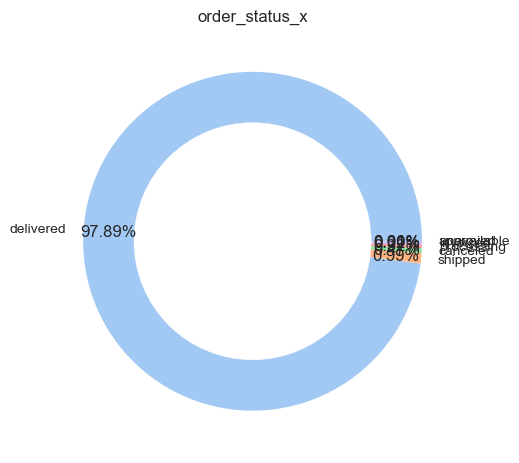

In [31]:
create_donut_plot(df, 'order_status_x')

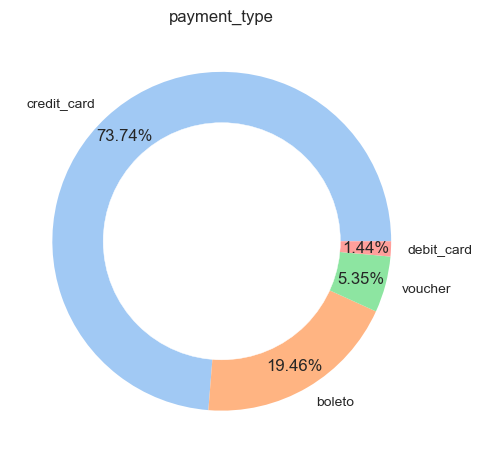

In [32]:
create_donut_plot(df, 'payment_type')

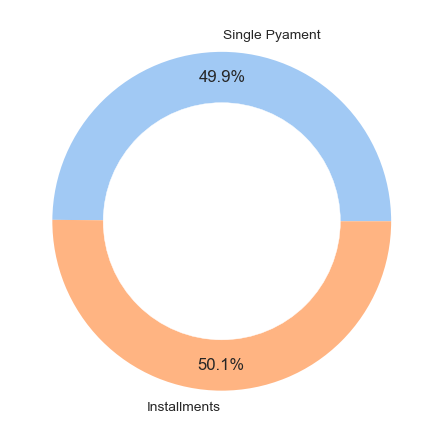

In [33]:
create_donut_plot(df, 'payment_installments')

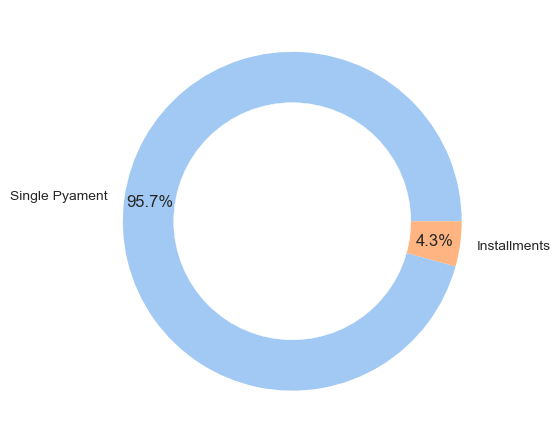

In [34]:
create_donut_plot(df, 'payment_sequential')

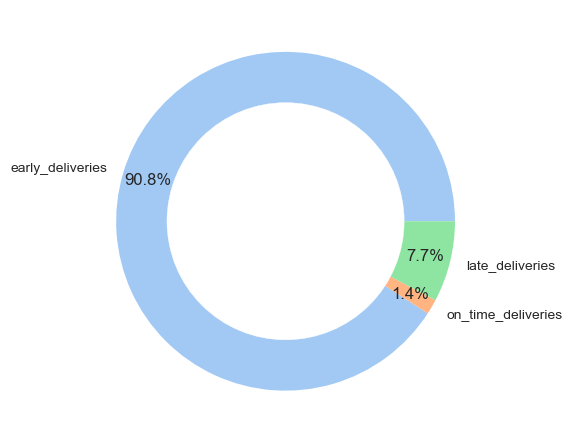

In [35]:
create_donut_plot(df, 'late_orders_x')

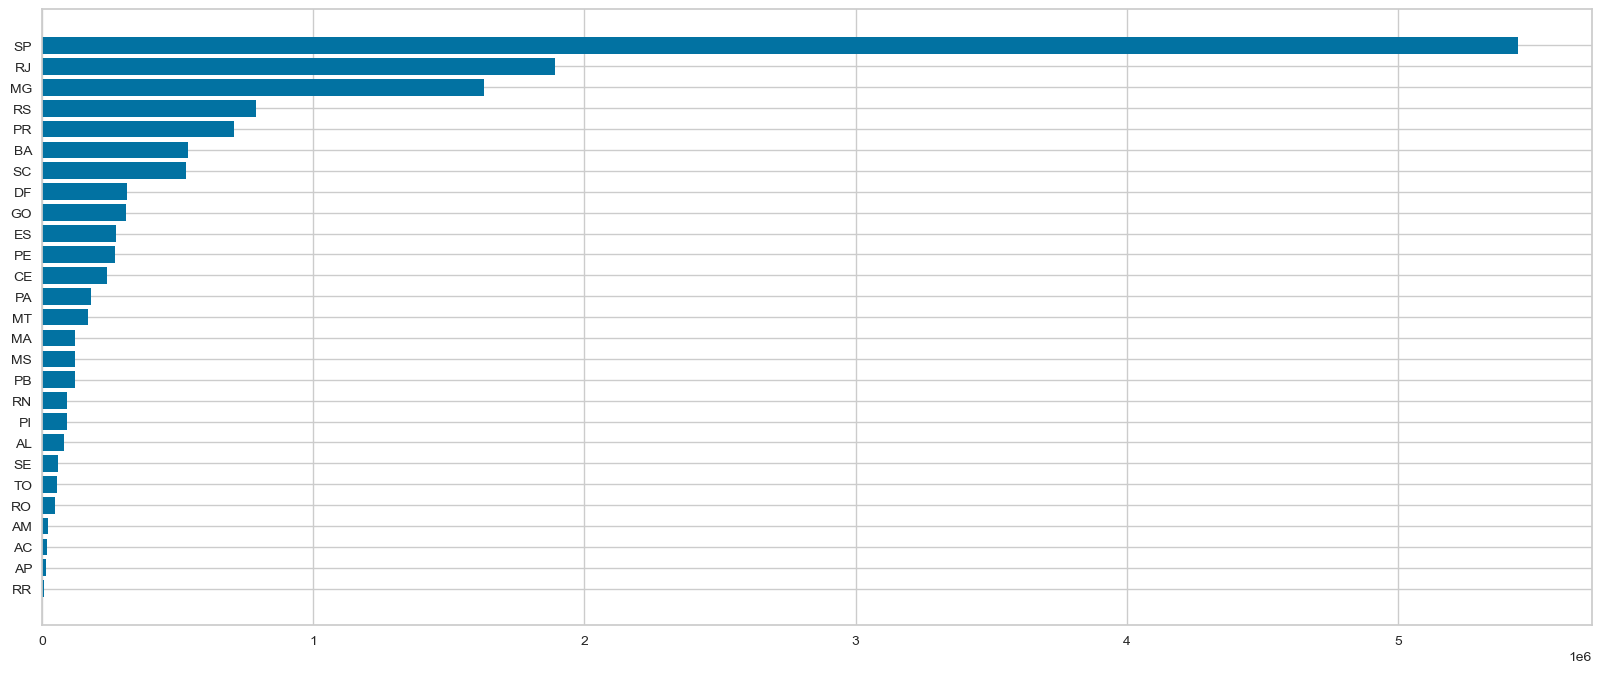

In [36]:
create_bar_chart(df, 'customer_state')

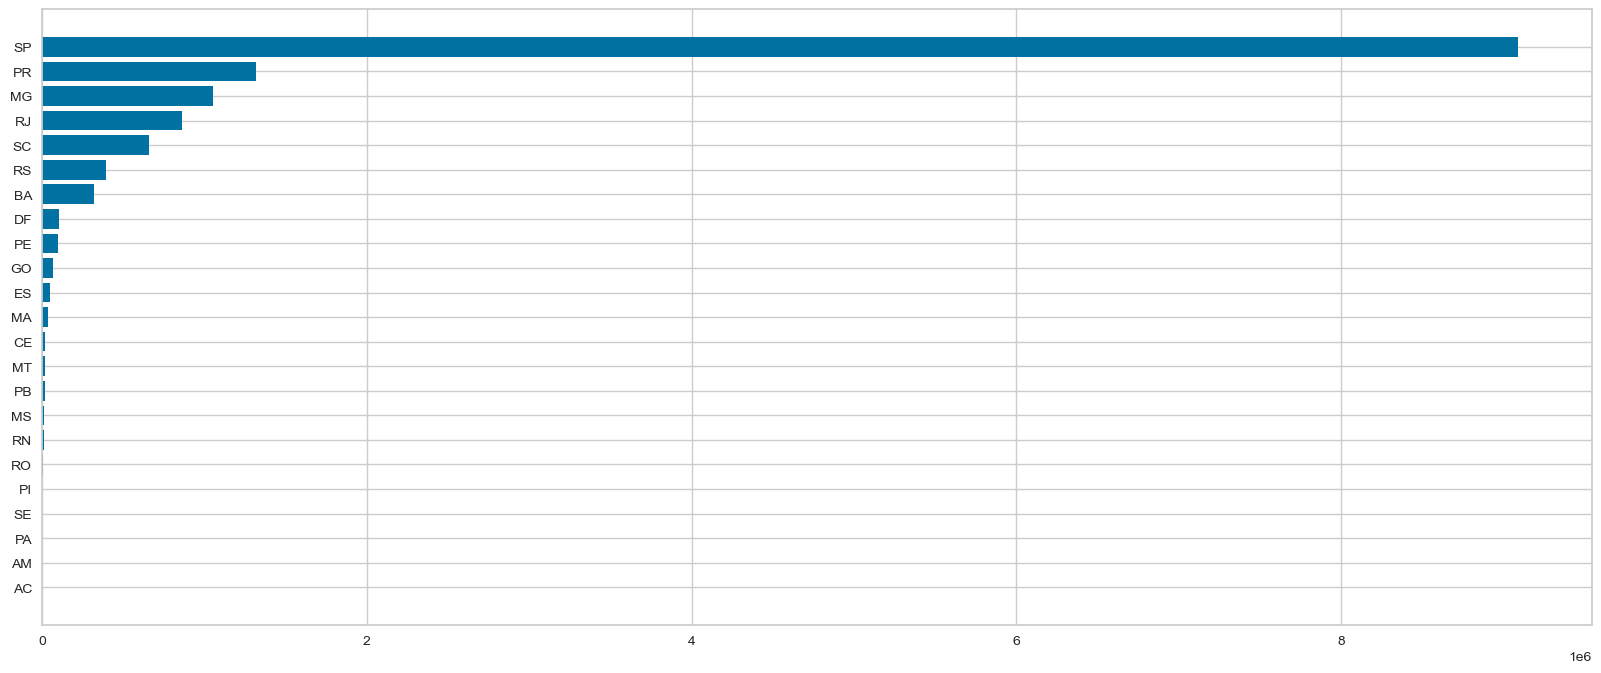

In [37]:
create_bar_chart(df, 'seller_state')

In [38]:
impact_of_late_orders(df, 'late_orders_x')

In [39]:
px.histogram(x=df['review_score'])

### year wise sales analysis

In [40]:
year2016 = df[df['order_delivered_customer_date_x'].dt.year == 2016]
year2016['Month'] = year2016['order_delivered_customer_date_x'].dt.month
year2016['order_delivered_customer_date_x']
early_deliveries = [x for x in year2016['late_orders_x'] if x <= 0]
late_deliveries = [x for x in year2016['late_orders_x'] if x > 0]
revenue2016 = year2016.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum'})
revenue2016['total_revenue'] = revenue2016.price + revenue2016.freight_value
revenue2016

order_id     price  freight_value  total_revenue
Month                                                  
10          207  30349.34        4610.25       34959.59
11           58  10805.48        1756.43       12561.91
12            3    581.89         114.88         696.77

In [41]:
year2017 = df[df['order_delivered_customer_date_x'].dt.year == 2017]
year2017['Month'] = year2017['order_delivered_customer_date_x'].dt.month
year2017['order_delivered_customer_date_x']
early_deliveries = [x for x in year2017['late_orders_x'] if x <= 0]
late_deliveries = [x for x in year2017['late_orders_x'] if x > 0]
revenue2017 = year2017.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum'})
revenue2017['total_revenue'] = revenue2017.price + revenue2017.freight_value
revenue2017

order_id      price  freight_value  total_revenue
Month                                                   
1           281   37051.03        5400.91       42451.94
2          1344  209710.98       31130.10      240841.08
3          2363  357062.87       54829.69      411892.56
4          1836  278314.49       40721.34      319035.83
5          3731  553713.90       85232.43      638946.33
6          3194  459949.81       75082.09      535031.90
7          3425  479716.64       81072.27      560788.91
8          4279  569388.04       98234.53      667622.57
9          3924  608757.83       94009.19      702767.02
10         4471  686267.51      108342.77      794610.28
11         4642  680179.57      108106.55      788286.12
12         7147  973730.40      162613.63     1136344.03

In [42]:
year2018 = df[df['order_delivered_customer_date_x'].dt.year == 2018]
year2018['Month'] = year2018['order_delivered_customer_date_x'].dt.month
year2018['order_delivered_customer_date_x']
early_deliveries = [x for x in year2018['late_orders_x'] if x <= 0]
late_deliveries = [x for x in year2018['late_orders_x'] if x > 0]
revenue2018 = year2018.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum'})
revenue2018['total_revenue'] = revenue2018.price + revenue2018.freight_value
revenue2018

order_id       price  freight_value  total_revenue
Month                                                    
1          6540   873735.91      146904.59     1020640.50
2          5801   784907.79      130091.63      914999.42
3          6786   922293.17      157414.33     1079707.50
4          7785  1146234.16      193962.81     1340196.97
5          7069  1046298.34      167742.01     1214040.35
6          6804  1039203.82      175278.00     1214481.82
7          5805   828263.96      157495.40      985759.36
8          8276  1168315.05      212617.32     1380932.37
9            55    11426.14        1392.50       12818.64
10            3      275.40          72.55         347.95

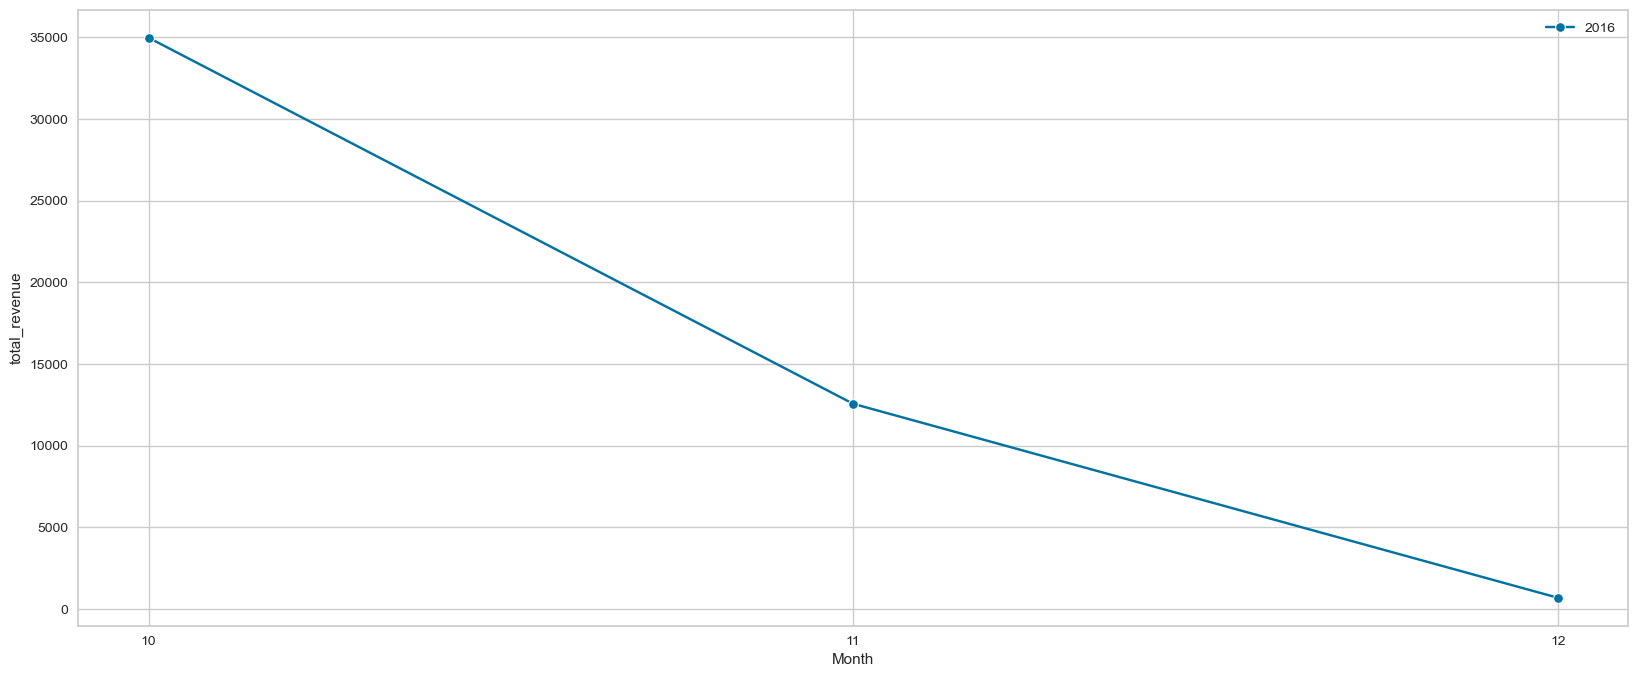

In [43]:
plt.figure(figsize=(20, 8))
sns.lineplot(y = revenue2016['total_revenue'], x = revenue2016.index, marker = 'o', label = '2016')
plt.xticks([10, 11, 12])
plt.legend()

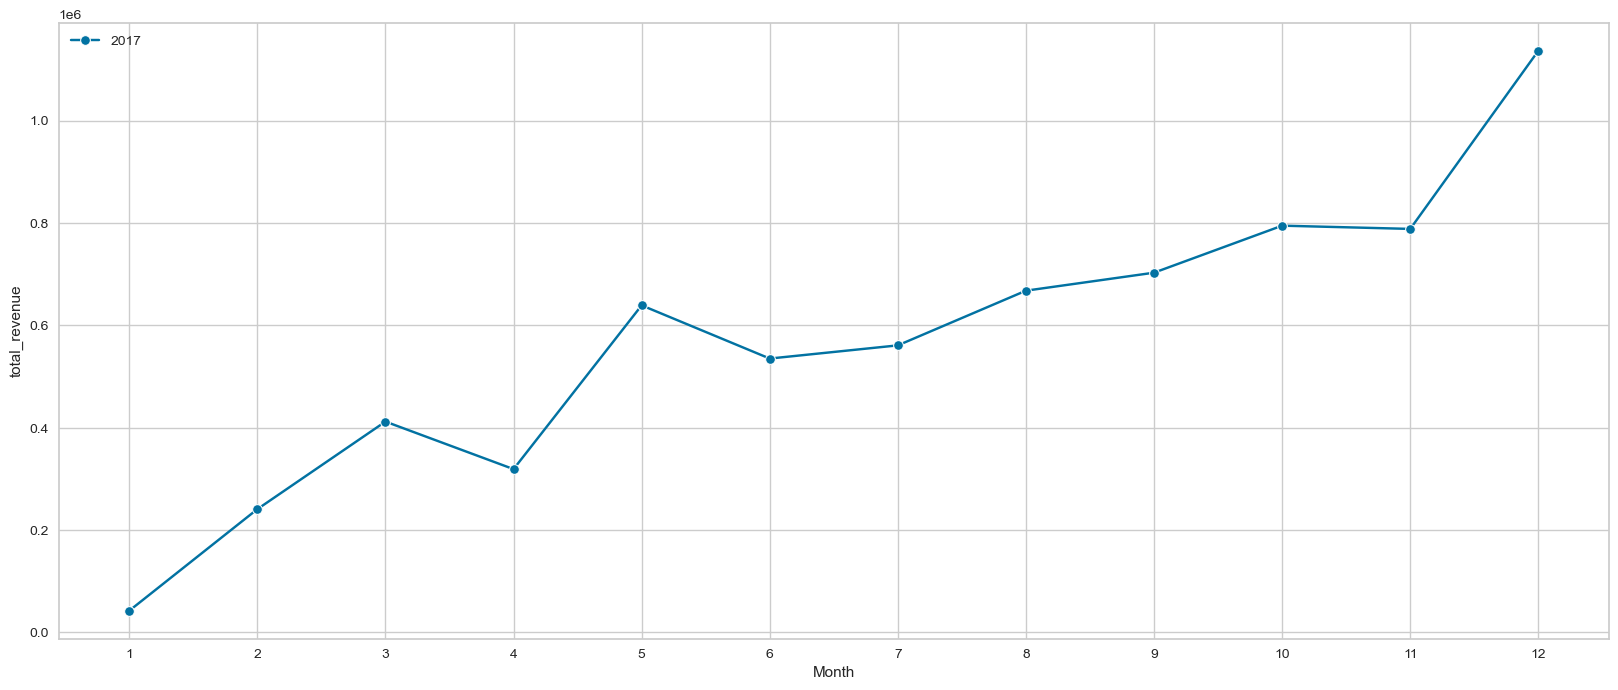

In [44]:
plt.figure(figsize=(20, 8))
sns.lineplot(y = revenue2017['total_revenue'], x = revenue2017.index, marker = 'o', label = '2017')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()

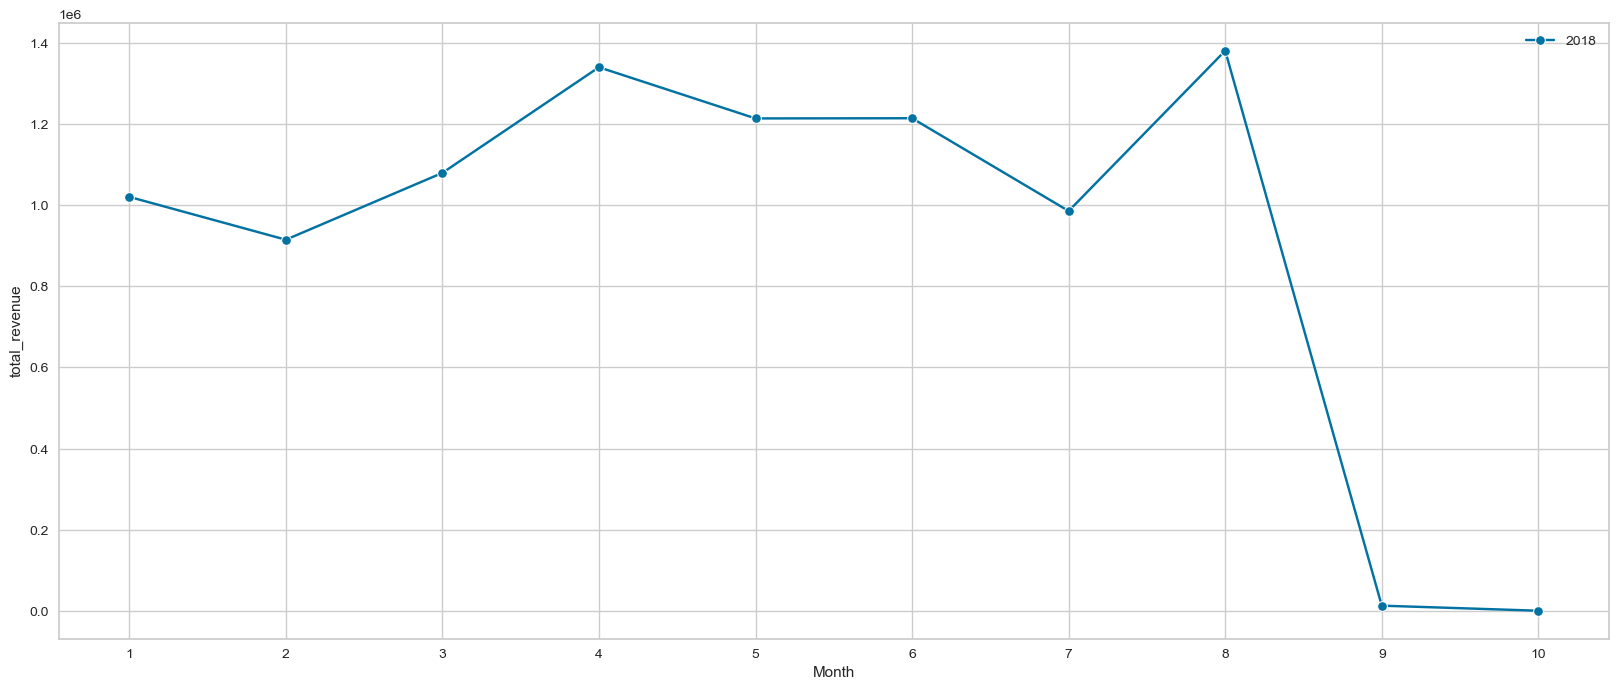

In [45]:
plt.figure(figsize=(20, 8))
sns.lineplot(y = revenue2018['total_revenue'], x = revenue2018.index, marker = 'o', label = '2018')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.legend()

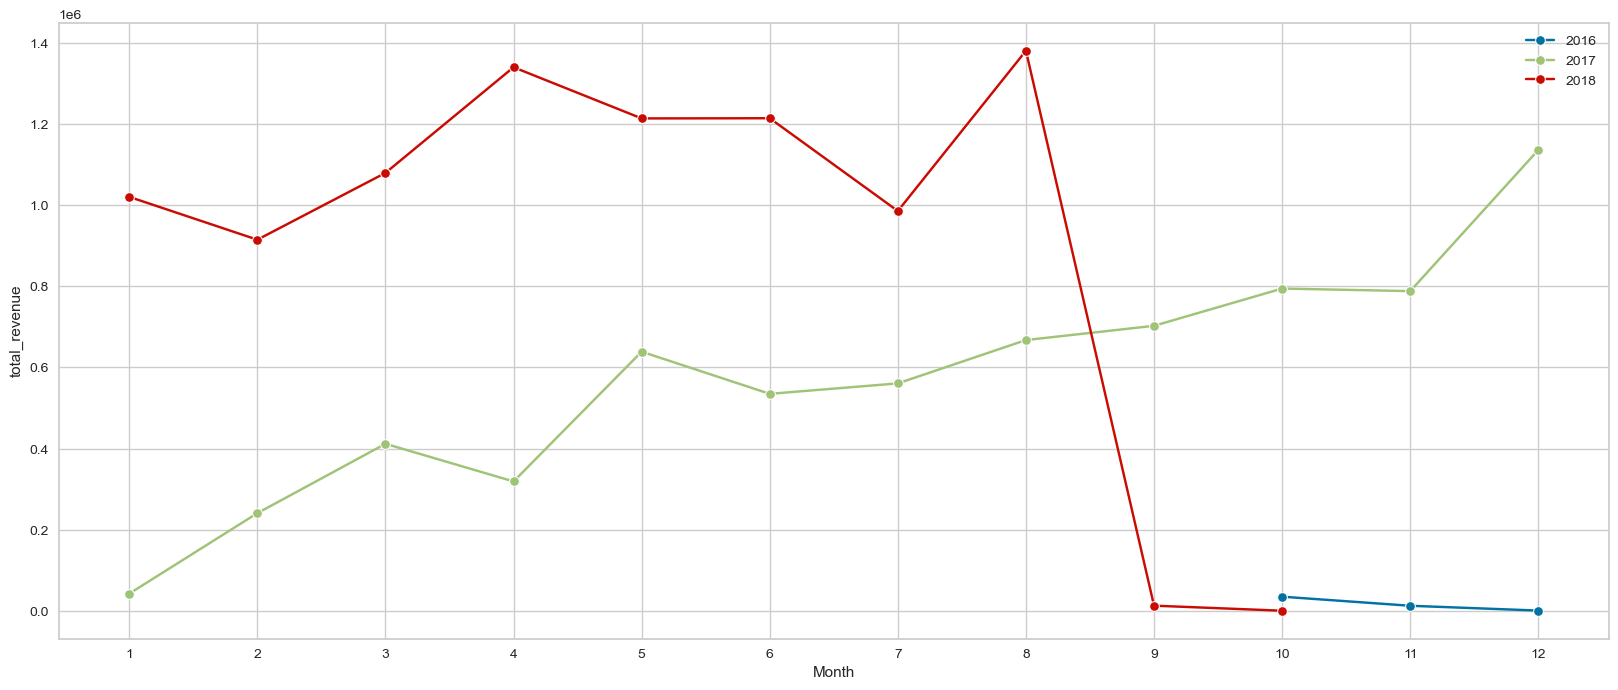

In [46]:
plt.figure(figsize=(20, 8))
sns.lineplot(y = revenue2016['total_revenue'], x = revenue2016.index, marker = 'o', label = '2016')
sns.lineplot(y = revenue2017['total_revenue'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['total_revenue'], x = revenue2018.index, marker = 'o', label = '2018')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()

In [47]:
df

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
117324  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
117325  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
117326  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
117327  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
117328  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4           delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
...               ...                        ...                  ...   
117324      delivered        2018-07-01 10:23:10  2018-07-05 16:17:52   
117325       canceled        2017-03-11 19:51:36  2017-03-11 19:51:36   
117326      delivered        2018-07-24 09:46:27  2018-07-24 11:24:27   
117327      delivered        2018-05-22 21:13:21  2018-05-22 21:35:40   
117328      delivered        2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-08-17 15:28:33             2017-08-18 14:44:43   
4                 2017-08-04 17:35:43             2017-08-07 18:30:01   
...                               ...                             ...   
117324            2018-07-04 14:34:00             2018-07-09 15:06:57   
117325                            NaN                             NaT   
117326            2018-07-24 15:14:00             2018-08-02 22:47:35   
117327            2018-05-24 12:28:00             2018-06-12 23:11:29   
117328            2018-05-16 17:20:00             2018-05-21 14:31:41   

       order_estimated_delivery_date_x  order_item_id  \
0                           2017-10-18              1   
1                           2017-10-18              1   
2                           2017-10-18              1   
3                           2017-08-28              1   
4                           2017-08-15              1   
...                                ...            ...   
117324                      2018-07-20              1   
117325                      2017-03-30              1   
117326                      2018-08-16              1   
117327                      2018-06-08              1   
117328                      2018-05-29              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
117324  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
117325  241a1ffc9cf969b27de6e723

In [48]:
def count_days_form_last_purchase(customer_id):
    customer_data = df[df['customer_unique_id'] == customer_id]
    dates = customer_data['order_purchase_timestamp_x']
    dates = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]
    dates_ymd = [date.date() for date in dates]
    if len(set(dates_ymd)) == 1:
        unique_dates = [dates_ymd[0]]
    else:
        unique_dates = list(dict.fromkeys(dates_ymd))


    if len(unique_dates) >= 2:
        days_from_last_purchase = (unique_dates[-2] - unique_dates[-1]).days
        return np.abs(days_from_last_purchase)
    else:
        return 1

In [49]:
df = pd.read_csv("../data/01_raw/e_commerce.csv")

In [50]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-09-04 21:22:15             2017-09-05 19:20:20   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-09-15              1   
4                      2017-08-28              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-09-11 11:43:25  35.39           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     1          44.11  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3149     sao paulo             SP   
4                      3366     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    7025   guarulhos           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  31f31efcb333fcbad2b1371c8cf0fa84      delivered        2017-0

In [51]:
df['days_from_last_purchase'].value_counts()

days_from_last_purchase
1      111662
2         169
12        128
7          92
6          88
        ...  
278         2
326         2
332         2
522         2
238         2
Name: count, Length: 414, dtype: int64

In [52]:
def create_donut_plot_1(df, feature):
    match feature:
        case 'days_from_last_purchase':
            single_purchase = [x for x in df[feature] if x == 1]
            more_than_one_purchase = [x for x in df[feature] if x > 1]
            
            total = len(single_purchase) + len(more_than_one_purchase)
            lables = ['single_purchase', 'more_than_one_purchase']
            sizes = [len(single_purchase)/total, len(more_than_one_purchase)/total]
            
            plt.figure(figsize=(6, 6))
            colors = sns.color_palette('pastel')[0:2]
            plt.pie(sizes, labels=lables,
                    pctdistance=0.85, autopct='%1.1f%%',
                    colors=colors)
            my_circle=plt.Circle( (0,0), 0.7, color='white')
            p=plt.gcf()
            p.gca().add_artist(my_circle)
        
            return plt.show()
        
        case _:
            print("Error")

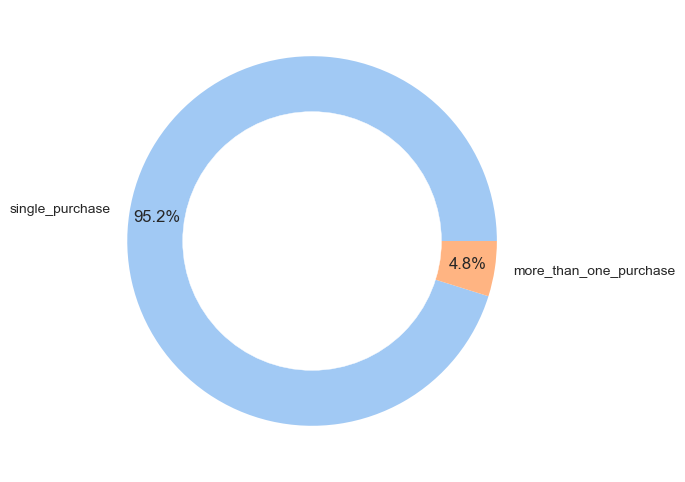

In [53]:
create_donut_plot_1(df, 'days_from_last_purchase')

In [54]:
payment_sequentials = df['payment_sequential'].value_counts()
payment_sequentials = pd.DataFrame(payment_sequentials.head())

In [55]:
payment_sequentials = pd.DataFrame(payment_sequentials.head().sort_values(by='count', ascending=False))

In [56]:
payment_sequentials

count
payment_sequential        
1                   112281
2                     3359
3                      646
4                      315
5                      189

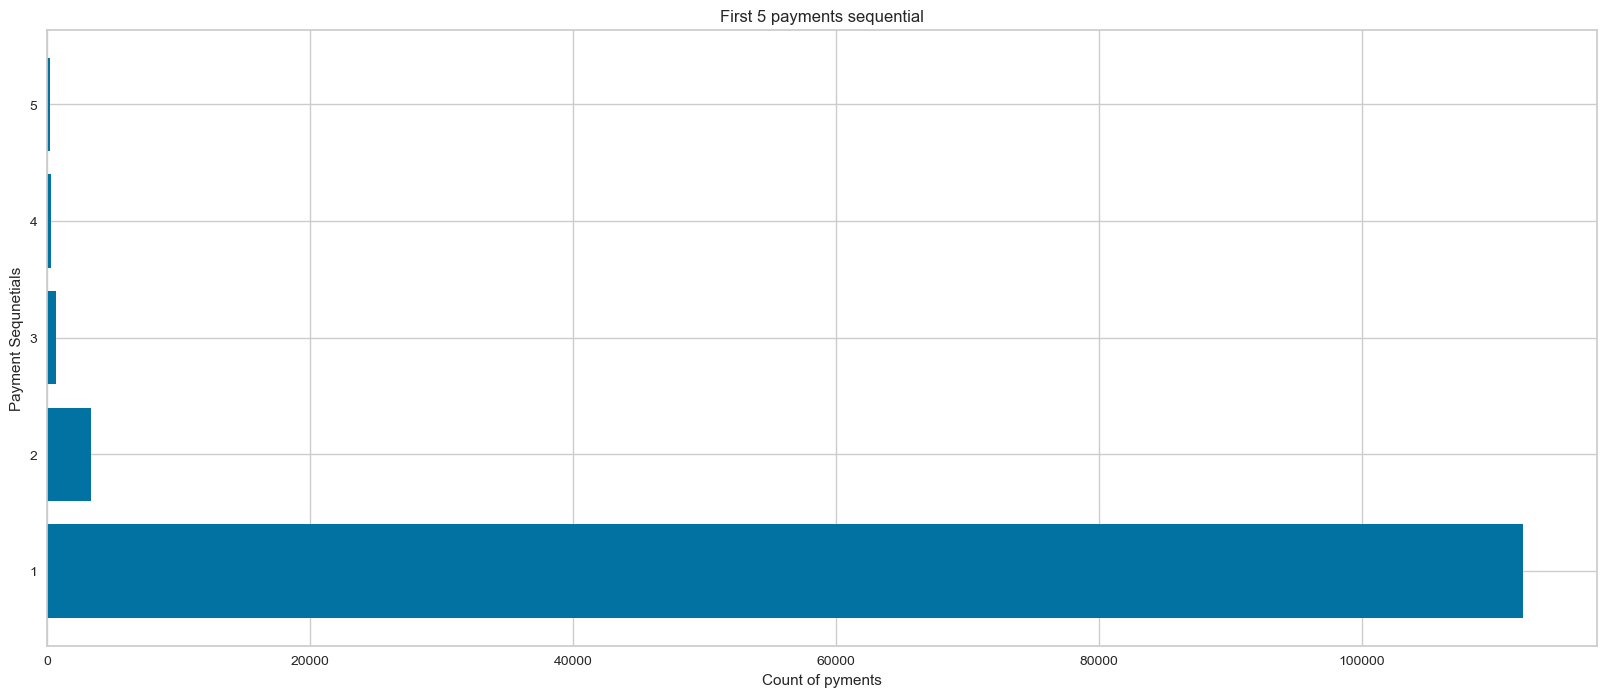

In [57]:
figure(figsize=(20, 8))
plt.barh(payment_sequentials.index, payment_sequentials['count'], align='center')
plt.title("First 5 payments sequential")
plt.xlabel("Count of pyments")
plt.ylabel("Payment Sequnetials")
plt.show()

In [58]:
payment_installments = df['payment_installments'].value_counts()
payment_installments = pd.DataFrame(payment_installments.head(10))

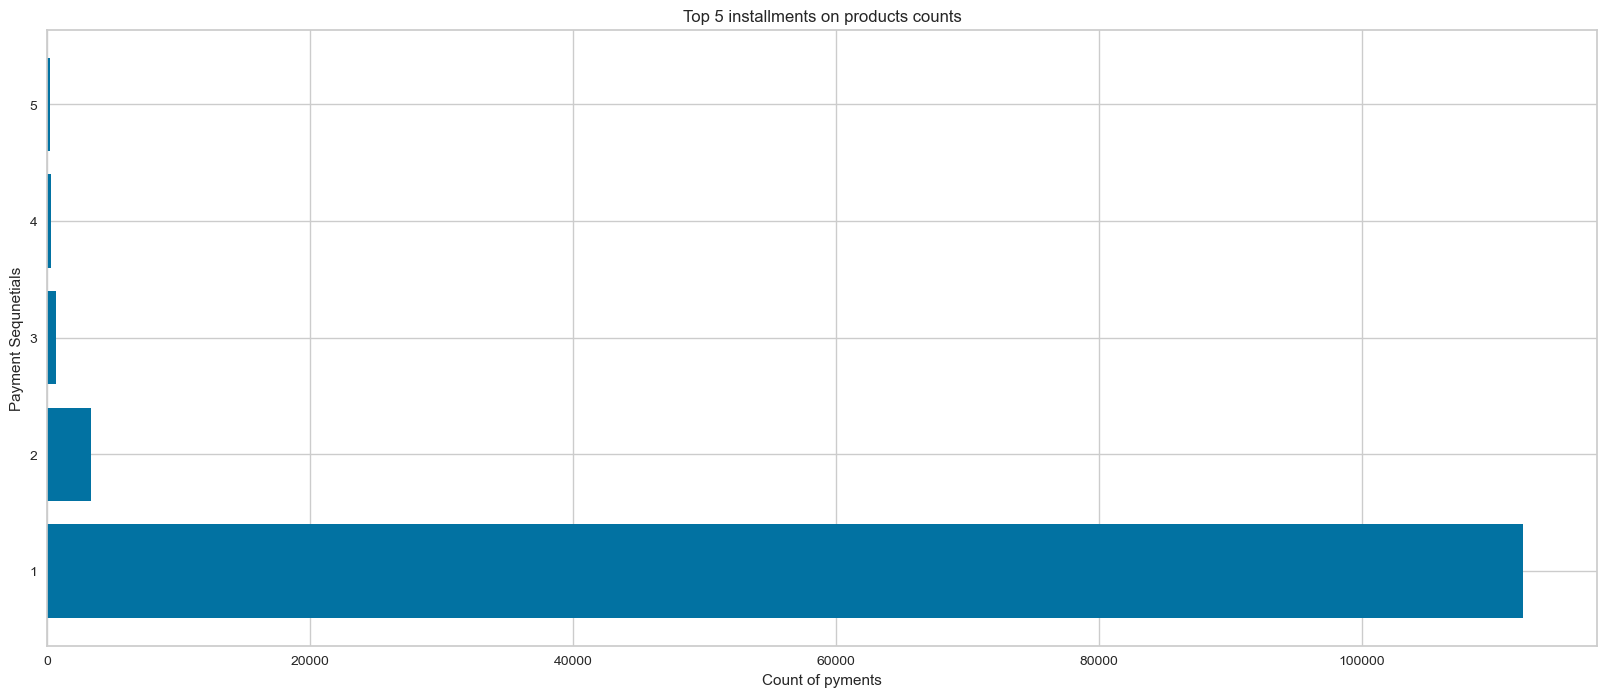

In [59]:
figure(figsize=(20, 8))
plt.barh(payment_sequentials.index, payment_sequentials['count'])
plt.title("Top 5 installments on products counts")
plt.xlabel("Count of pyments")
plt.ylabel("Payment Sequnetials")
plt.show()

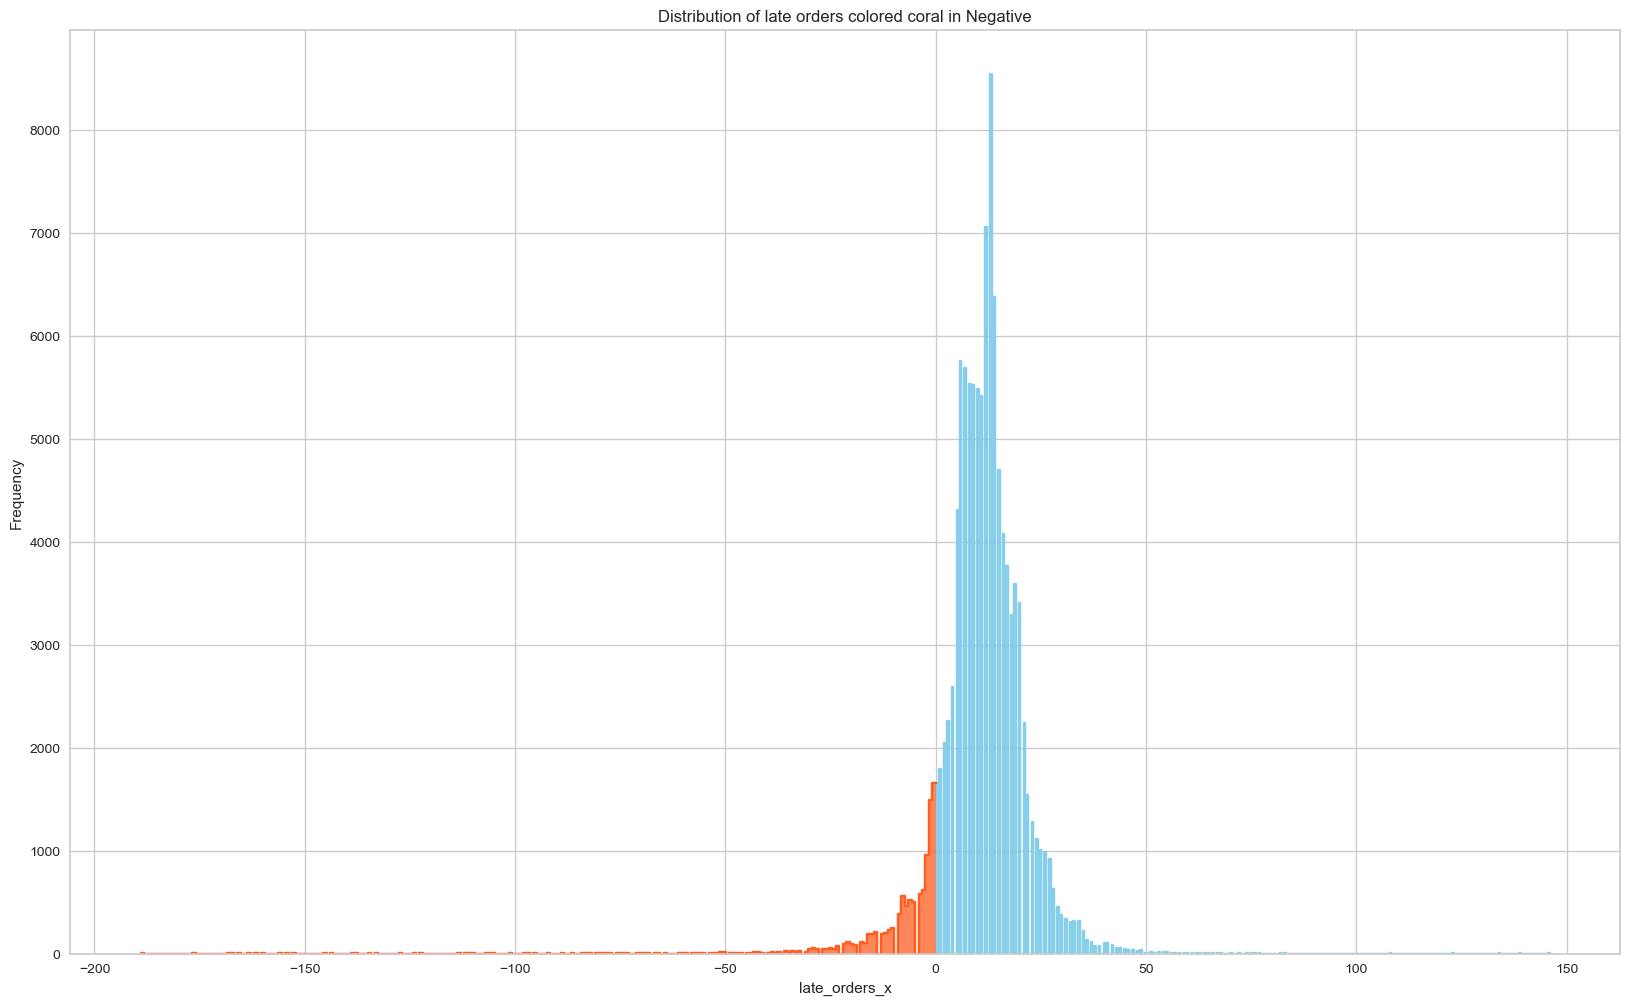

In [60]:
figure(figsize=(20, 12))

sns.histplot(df['late_orders_x'][df['late_orders_x'] >= 0], kde=False, element='step', fill=False, color='skyblue')
sns.histplot(df['late_orders_x'][df['late_orders_x'] <= 0], kde=False, element='step', fill=True, color='#FF5D22')
sns.histplot(df['late_orders_x'][df['late_orders_x'] <= 0], kde=False, element='step', fill=False, color='#FF5D22')

plt.title("Distribution of late orders colored coral in Negative")
plt.ylabel("Frequency")
plt.show()

In [61]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [62]:
order_reviews.loc[order_reviews['review_score'] <= 3, 'review_score'] = 0
order_reviews.loc[order_reviews['review_score'] > 3, 'review_score'] = 1

In [63]:
order_reviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 1                  NaN   
1                 1                  NaN   
2                 1                  NaN   
3                 1                  NaN   
4                 1                  NaN   
...             ...                  ...   
99219             1                  NaN   
99220             1                  NaN   
99221             1                  NaN   
99222             1                  NaN   
99223             0                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [64]:
review_comment_title = order_reviews['review_comment_title'].value_counts().head(10)
review_comment_title = pd.DataFrame(review_comment_title)

In [65]:
review_comment_title

count
review_comment_title       
Recomendo               423
recomendo               345
Bom                     293
super recomendo         270
Excelente               248
Muito bom               247
Ótimo                   240
Super recomendo         217
Ótimo                   207
Otimo                   174

In [66]:
review_comment_title['Review_Title'] = review_comment_title.index.map(lambda x: GoogleTranslator(target='en').translate(x))

In [67]:
review_comment_title.reset_index(drop=True, inplace=True)

In [68]:
review_comment_title

count      Review_Title
0    423       I recommend
1    345       I recommend
2    293               Bom
3    270  highly recommend
4    248             Great
5    247         Very good
6    240         Excellent
7    217  highly recommend
8    207         Excellent
9    174         Excellent

Text(0.5, 1.0, 'Top 10 reviews comment title')

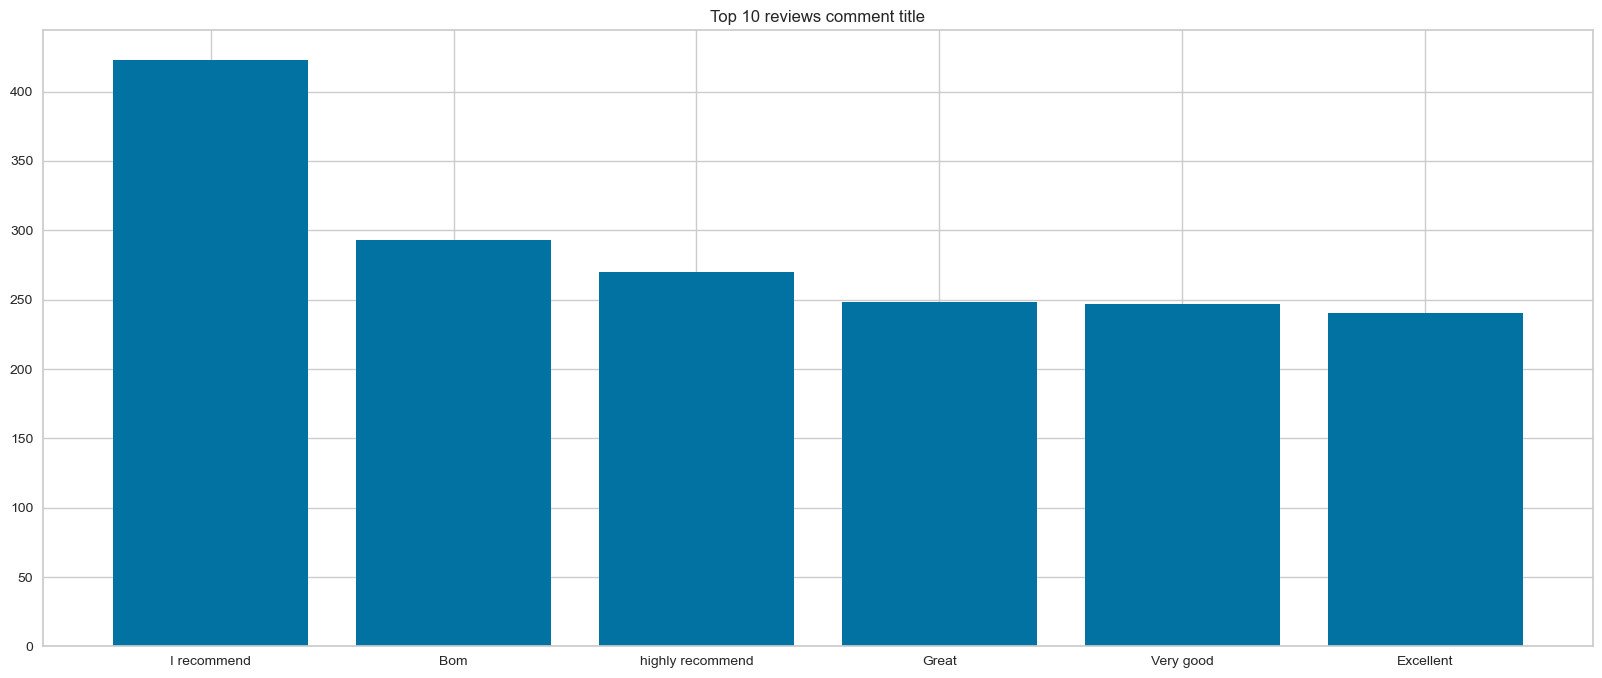

In [69]:
figure(figsize=(20, 8))
plt.bar(review_comment_title['Review_Title'], review_comment_title['count'])
plt.title("Top 10 reviews comment title")

In [70]:
review_comment_message = order_reviews['review_comment_message'].value_counts().head(10)
review_comment_message = pd.DataFrame(review_comment_message)

In [71]:
review_comment_message

count
review_comment_message       
Muito bom                 230
Bom                       189
muito bom                 122
bom                       107
Recomendo                 100
Otimo                      99
otimo                      96
Ótimo                      77
Ótimo                      74
Ok                         72

Text(0.5, 1.0, 'Top 10 reviews comment mesages')

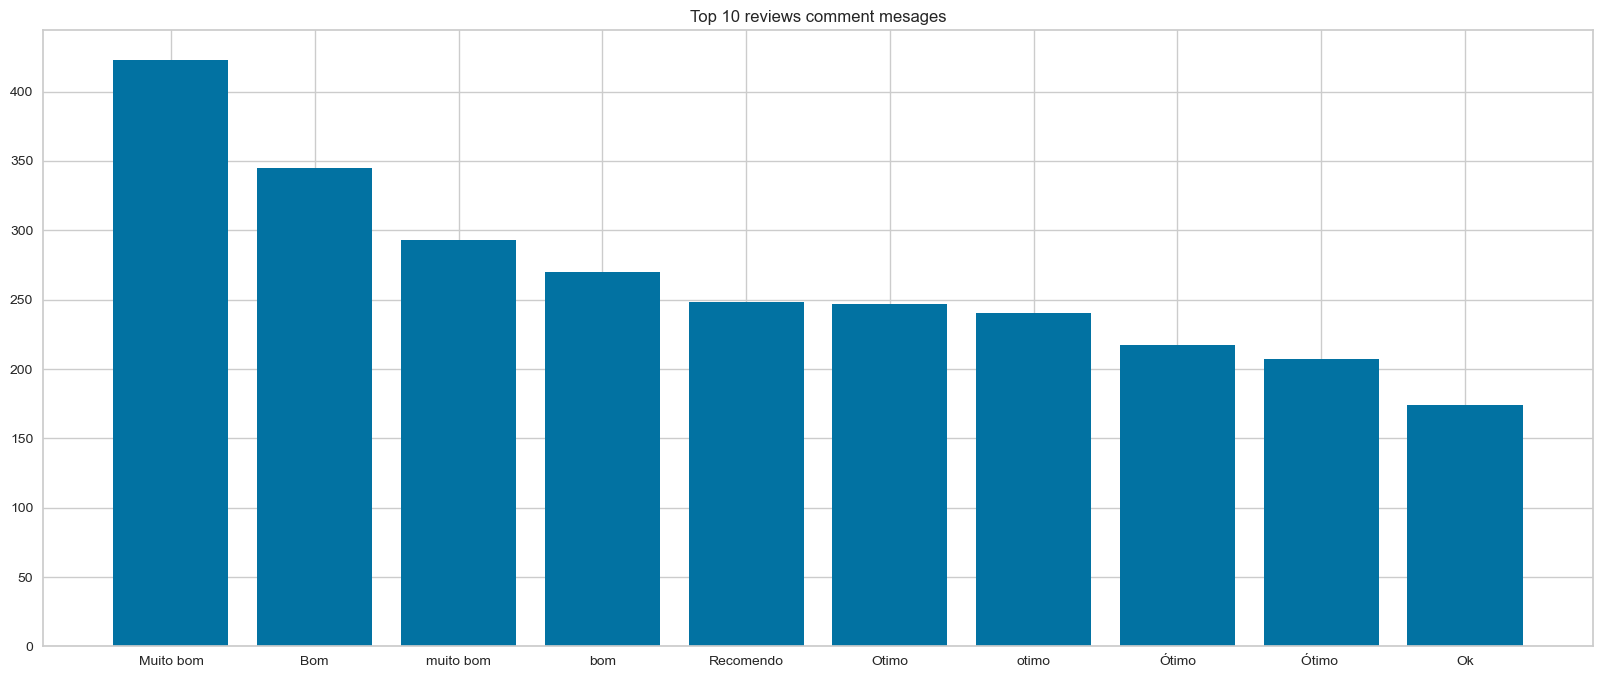

In [72]:
figure(figsize=(20, 8))
plt.bar(review_comment_message.index, review_comment_title['count'])
plt.title("Top 10 reviews comment mesages")

In [73]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-09-04 21:22:15             2017-09-05 19:20:20   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-09-15              1   
4                      2017-08-28              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-09-11 11:43:25  35.39           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     1          44.11  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3149     sao paulo             SP   
4                      3366     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    7025   guarulhos           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  31f31efcb333fcbad2b1371c8cf0fa84      delivered        2017-0

In [74]:
df['late_orders_x'] = df['late_orders_x'].map(lambda x: 0 if x < 0 else 1)

In [75]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-09-04 21:22:15             2017-09-05 19:20:20   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-09-15              1   
4                      2017-08-28              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-09-11 11:43:25  35.39           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     1          44.11  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3149     sao paulo             SP   
4                      3366     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    7025   guarulhos           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  31f31efcb333fcbad2b1371c8cf0fa84      delivered        2017-0

In [76]:
def how_many_time_customer_purchase(customer_id):
    customer_data = df[df['customer_unique_id'] == customer_id]
    return customer_data.shape[0]

In [77]:
feature = 'customer_unique_id'

In [79]:
numRows = 0
results = []
for chunk in pd.read_csv("../data/01_raw/e_commerce.csv", chunksize=5000):
    numRows += len(chunk)
    customer_ids = chunk[feature].unique()
    for customer_id in customer_ids:
        count = how_many_time_customer_purchase(customer_id)
        results.append({'customer_unique_id': customer_id, 'how_many_time_customer_purchase': count})
    print("{0} rows processed".format(numRows))

5000 rows processed
10000 rows processed
15000 rows processed
20000 rows processed
25000 rows processed
30000 rows processed
35000 rows processed
40000 rows processed
45000 rows processed
50000 rows processed
55000 rows processed
60000 rows processed
65000 rows processed
70000 rows processed
75000 rows processed
80000 rows processed
85000 rows processed
90000 rows processed
95000 rows processed
100000 rows processed
105000 rows processed
110000 rows processed
115000 rows processed
117329 rows processed


In [80]:
how_many_time_customer_purchase_dataframe = pd.DataFrame(results)

In [81]:
how_many_time_customer_purchase_dataframe.head()

customer_unique_id  how_many_time_customer_purchase
0  7c396fd4830fd04220f754e42b4e5bff                                4
1  3a51803cc0d012c3b5dc8b7528cb05f7                                1
2  ef0996a1a279c26e7ecbd737be23d235                                1
3  e781fdcc107d13d865fc7698711cc572                                1
4  02c9e0c05a817d4562ec0e8c90f29dba                                1

In [82]:
df = (df.merge(how_many_time_customer_purchase_dataframe, on='customer_unique_id'))

In [83]:
df

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
...                                  ...                               ...   
117353  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
117354  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
117355  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
117356  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
117357  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
...               ...                        ...                  ...   
117353      delivered        2018-07-01 10:23:10  2018-07-05 16:17:52   
117354       canceled        2017-03-11 19:51:36  2017-03-11 19:51:36   
117355      delivered        2018-07-24 09:46:27  2018-07-24 11:24:27   
117356      delivered        2018-05-22 21:13:21  2018-05-22 21:35:40   
117357      delivered        2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-09-04 21:22:15             2017-09-05 19:20:20   
4                 2017-08-17 15:28:33             2017-08-18 14:44:43   
...                               ...                             ...   
117353            2018-07-04 14:34:00             2018-07-09 15:06:57   
117354                            NaN                             NaN   
117355            2018-07-24 15:14:00             2018-08-02 22:47:35   
117356            2018-05-24 12:28:00             2018-06-12 23:11:29   
117357            2018-05-16 17:20:00             2018-05-21 14:31:41   

       order_estimated_delivery_date_x  order_item_id  \
0                           2017-10-18              1   
1                           2017-10-18              1   
2                           2017-10-18              1   
3                           2017-09-15              1   
4                           2017-08-28              1   
...                                ...            ...   
117353                      2018-07-20              1   
117354                      2017-03-30              1   
117355                      2018-08-16              1   
117356                      2018-06-08              1   
117357                      2018-05-29              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
117353  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
117354  241a1ffc9cf969b27de6e723

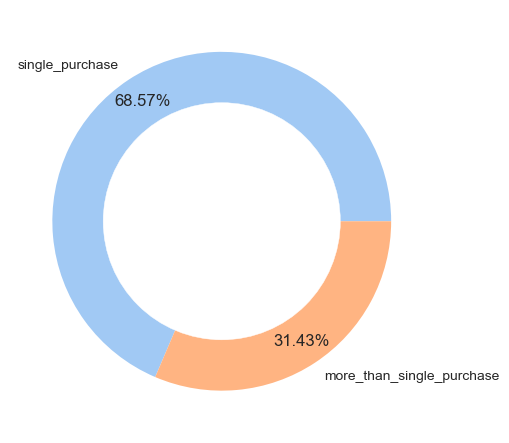

In [84]:
single_purchase = [x for x in df['how_many_time_customer_purchase'] if x == 1]
more_than_single_purchase = [x for x in df['how_many_time_customer_purchase'] if x > 1]
labels = ['single_purchase', 'more_than_single_purchase']
sizes = [len(single_purchase), len(more_than_single_purchase)]
colors = sns.color_palette('pastel')[0:2]
plt.pie(sizes, labels=labels, autopct="%1.2f%%", colors=colors, pctdistance=0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

In [85]:
# Review score distribution of single purchase
single_purchase_df = df[df['how_many_time_customer_purchase'] <= 1]
fig = px.histogram(x=single_purchase_df['review_score'])
fig.show()

In [86]:
single_purchase_df['review_score'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [87]:
single_purchase_df.shape

(80477, 50)

In [88]:
# Multiple Purchase review score distribution
multiple_purchase_df = df[df['how_many_time_customer_purchase'] > 1]
fig_1 = px.histogram(x=multiple_purchase_df['review_score'])
fig_1.show()

In [89]:
product_category

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [90]:
df = (df.merge(product_category, on = 'product_category_name'))

In [91]:
df

order_id                     customer_id_x  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
115633  796033ffde6ba06e0abe387e36ee8fe0  62d3c457010afc957d955568318e6d78   
115634  c3708e02f3ae7cf8e715ce16e826e952  5ca9eb2a7b36190faa6ea8897a5cc6be   
115635  9c9d2097d4c2b46f2963f34e32a57f35  44273202e14786abae757d5cd54ebba9   
115636  d4665434b01caa9dc3e3e78b3eb3593e  430629c51214778912efab67e023a8f1   
115637  30d7af26cb5f8577b5c6a0164dc814c5  e924482b6903522795771e672721f5d2   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2           delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3           delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4           delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
...               ...                        ...                  ...   
115633      delivered        2018-08-26 14:17:08  2018-08-26 14:25:15   
115634      delivered        2018-06-20 16:28:15  2018-06-20 17:00:22   
115635      delivered        2018-06-25 13:07:22  2018-06-25 13:17:39   
115636      delivered        2018-06-18 05:22:00  2018-06-18 06:09:34   
115637       canceled        2018-07-26 12:45:33  2018-07-26 12:55:25   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
0                 2017-10-04 19:55:00             2017-10-10 21:25:13   
1                 2017-10-04 19:55:00             2017-10-10 21:25:13   
2                 2017-10-04 19:55:00             2017-10-10 21:25:13   
3                 2017-08-17 15:28:33             2017-08-18 14:44:43   
4                 2017-08-04 17:35:43             2017-08-07 18:30:01   
...                               ...                             ...   
115633            2018-08-27 07:45:00             2018-08-29 18:48:44   
115634            2018-06-22 12:07:00             2018-07-05 12:47:37   
115635            2018-06-26 10:38:00             2018-07-04 00:59:39   
115636            2018-06-18 13:43:00             2018-06-21 22:48:57   
115637                            NaN                             NaN   

       order_estimated_delivery_date_x  order_item_id  \
0                           2017-10-18              1   
1                           2017-10-18              1   
2                           2017-10-18              1   
3                           2017-08-28              1   
4                           2017-08-15              1   
...                                ...            ...   
115633                      2018-09-11              1   
115634                      2018-07-23              1   
115635                      2018-07-25              1   
115636                      2018-07-13              1   
115637                      2018-08-07              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
115633  53e695484b71a194bf7d89b48700756a  e8ff5a6ceb895583033fc2a0f314e3c2   
115634  6e7f4ae007302e93c5610894

In [92]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [93]:
def product_category_sales(df):
            figure(figsize=(20, 8))
            df_bar = df.groupby('product_category_name').agg({'price': 'sum'})
            df_bar = df_bar['price'].sort_values(ascending=True)
            df_bar = pd.DataFrame(df_bar.head())
            plt.plot(df_bar.index, df_bar['price'])
            plt.scatter(df_bar.index, df_bar['price'])
            plt.bar(df_bar.index, df_bar['price'])
            plt.title("Top 5 in sales products")
            addlabels(df_bar.index, df_bar['price'])
            #df.groupby([feature])['price'].sum().sort_values(ascending=True).plot(kind='barh')
            return plt.show()

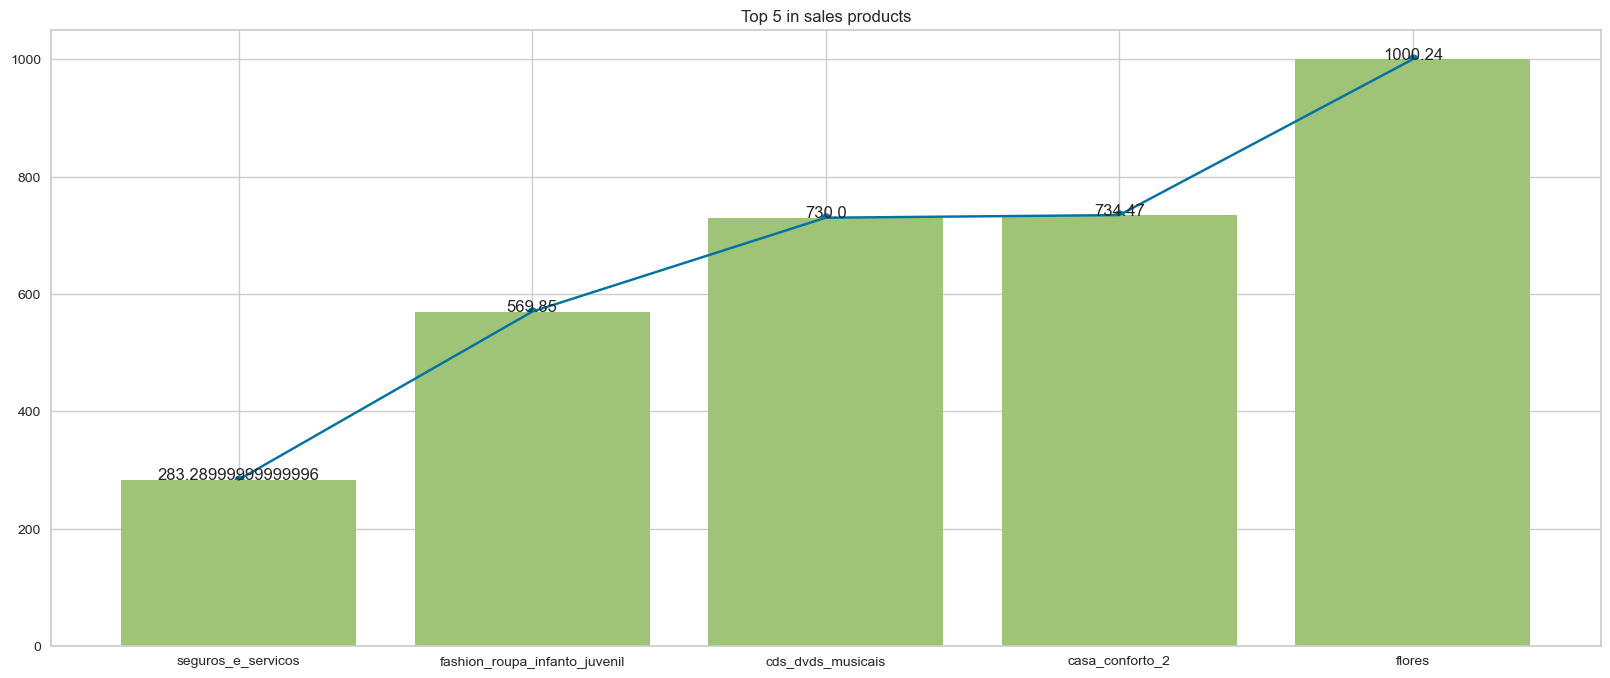

In [94]:
product_category_sales(df)

In [95]:
year2016

order_id                     customer_id_x  \
3413    64f5569ef96004a1e1137bdf28fd4c45  abd49ba4cf56e622b951f281361f56ad   
3445    7a7d2c889e27d93b2005462a8788e168  88927ff4f54b497957d9947e926ec6fe   
3870    98750f114ae6088d04ea0d3cfe3f137f  01fc05160cf790b9ed54ec795ff07688   
4277    95e01270fcbae9863423400103359279  7a692b1ff18c8c21156b886e02e80040   
4278    e2eaf909eb6ba881117aa407992a5ffb  4aa9a7eb520f8efdf80da20ba889f190   
...                                  ...                               ...   
117154  b330d4bdde86ff11a726ee57dd2a7d75  dfac72372f9e21b7edd69eddd81c7b63   
117160  d3f7c0e804b501782903f7af749eb797  303f96887b473d72e34c2d0e492fa43b   
117182  0ec61157a488963fe217233f74c52760  01415cfeb907d8ce0e17075b4c097fe9   
117264  a9fc3ae13c740ad46532fd50b61c69d5  04a043776b45158df5f274435321c199   
117293  2e8e21db96a8ab922e51cd297678c6b2  6a58b195be76f8ad6544e032b6c7316b   

       order_status_x order_purchase_timestamp_x  order_approved_at_x  \
3413        delivered        2016-10-05 21:10:56  2016-10-06 15:59:50   
3445        delivered        2016-10-05 00:32:31  2016-10-06 15:57:05   
3870        delivered        2016-10-05 11:44:41  2016-10-06 03:07:51   
4277        delivered        2016-10-04 18:52:56  2016-10-06 15:51:42   
4278        delivered        2016-10-05 11:05:52  2016-10-07 02:49:09   
...               ...                        ...                  ...   
117154      delivered        2016-10-05 22:24:40  2016-10-06 16:06:05   
117160      delivered        2016-10-10 13:57:41  2016-10-10 14:42:00   
117182      delivered        2016-10-09 23:50:37  2016-10-10 11:04:05   
117264      delivered        2016-10-04 22:43:33  2016-10-06 15:44:56   
117293      delivered        2016-10-09 12:13:58  2016-10-10 01:16:09   

       order_delivered_carrier_date_x order_delivered_customer_date_x  \
3413              2016-10-30 13:27:40             2016-10-31 13:27:40   
3445              2016-10-30 14:03:48             2016-10-31 14:03:48   
3870              2016-10-10 03:07:51             2016-10-28 12:23:43   
4277              2016-11-01 07:27:42             2016-11-04 17:54:00   
4278              2016-11-01 07:13:36             2016-11-14 15:03:36   
...                               ...                             ...   
117154            2016-10-14 18:31:23             2016-10-17 19:31:23   
117160            2016-10-14 14:42:00             2016-10-17 15:42:00   
117182            2016-10-25 13:55:42             2016-10-31 11:54:44   
117264            2016-10-10 15:44:57             2016-10-13 15:44:57   
117293            2016-10-25 13:54:41             2016-10-28 14:11:47   

       order_estimated_delivery_date_x  order_item_id  \
3413                        2016-11-29              1   
3445                        2016-11-25              1   
3870                        2016-11-29              1   
4277                        2016-11-24              1   
4278                        2016-11-25              1   
...                                ...            ...   
117154                      2016-11-25              1   
117160                      2016-12-02              1   
117182                      2016-12-02              1   
117264                      2016-11-28              1   
117293                      2016-12-02              1   

                              product_id                         seller_id  \
3413    ecac086eca2f806295b1f43b4f6ca119  dc8798cbf453b7e0f98745e396cc5616   
3445    f6fe388c9bfc145a2790437f1e4888d9  dc8798cbf453b7e0f98745e396cc5616   
3870    5c75915e4a74994308fe805cdbfbf5f5  63b9ae557efed31d1f7687917d248a8d   
4277    b73f6899a58fe7a37e55149e9a11c717  a7f13822ceb966b076af67121f87b063   
4278    b73f6899a58fe7a37e55149e9a11c717  a7f13822ceb966b076af67121f87b063   
...                                  ...                               ...   
117154  382d28bfa85a9857cd10bfdb1b8b7f80  4b90495391ac0bd181a80a459df1e718   
117160  571e2f5577f9e5ac24fc2a1d

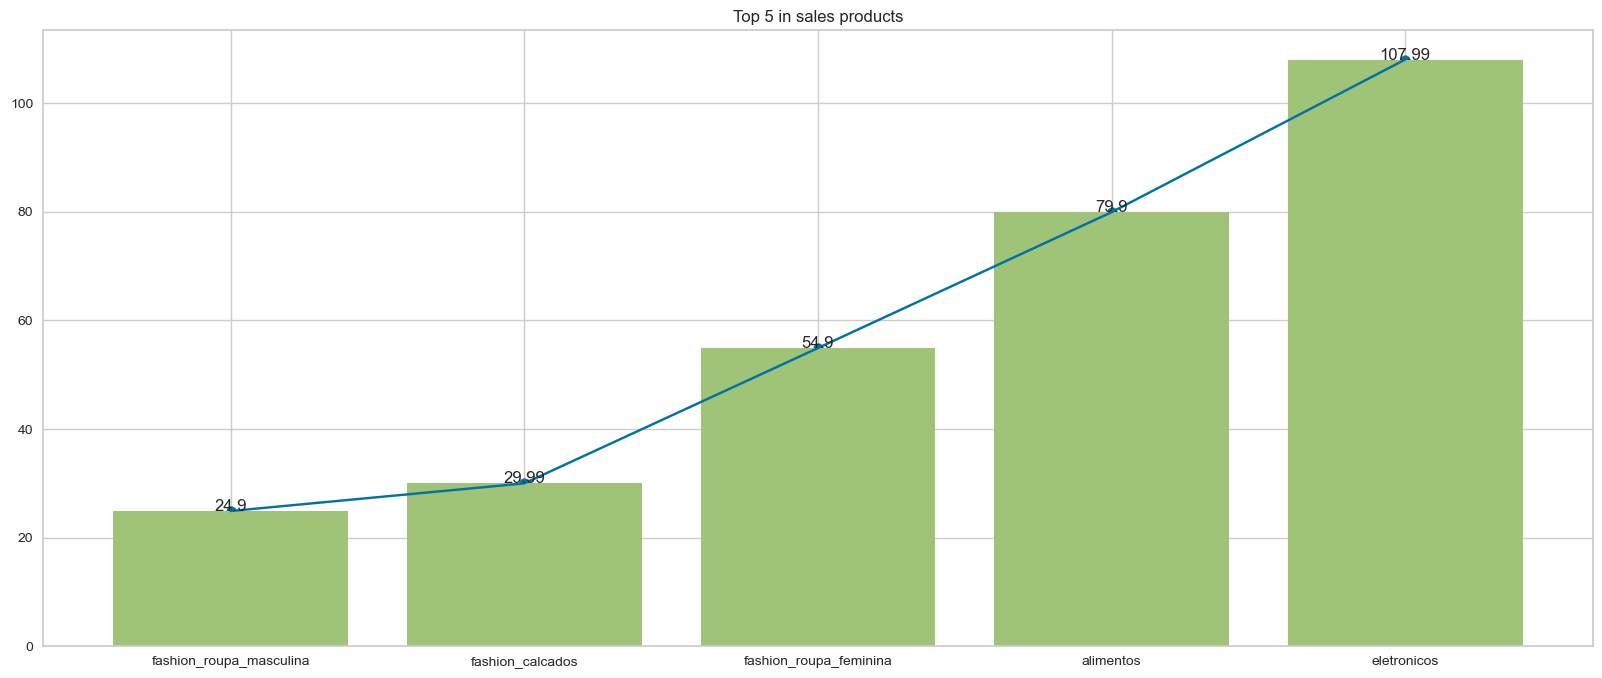

In [96]:
product_category_sales(year2016)

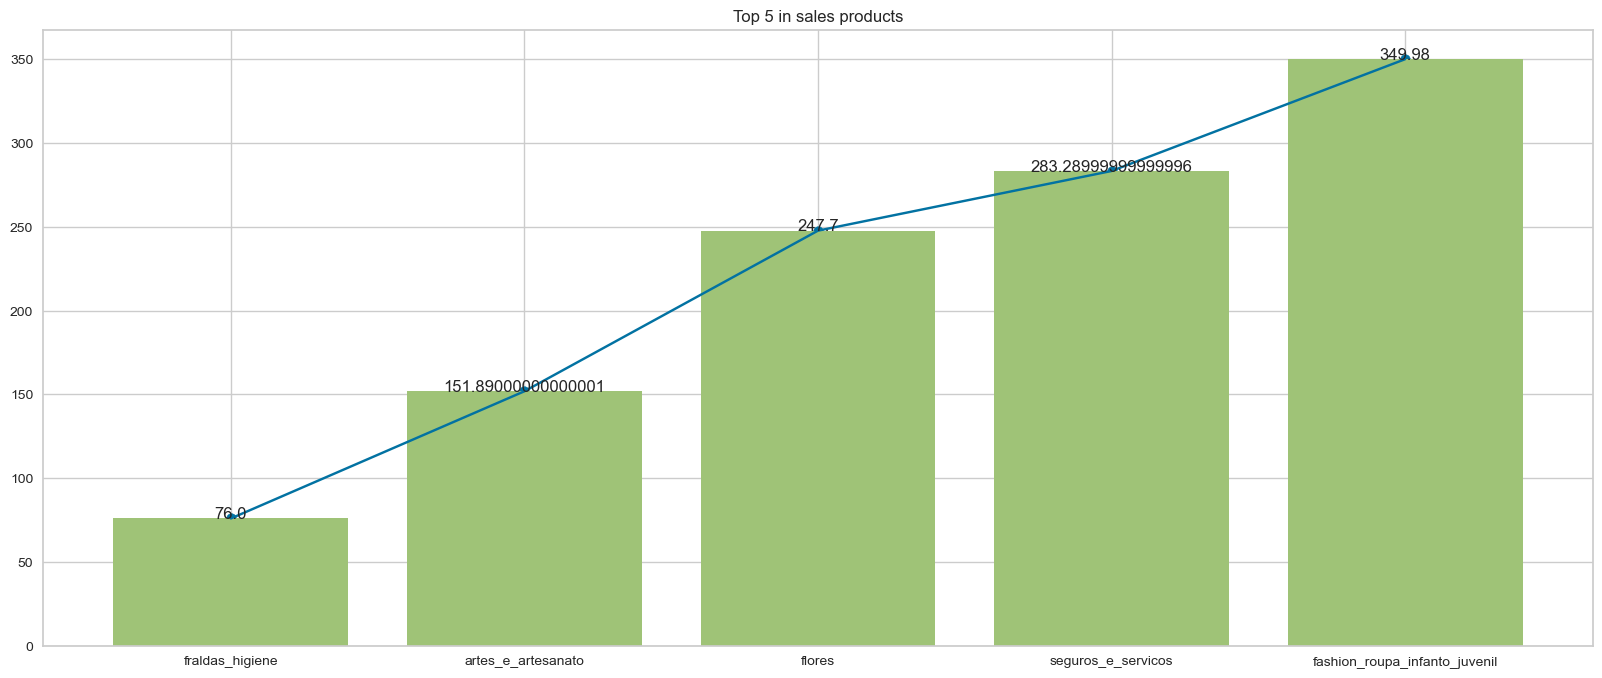

In [97]:
product_category_sales(year2017)

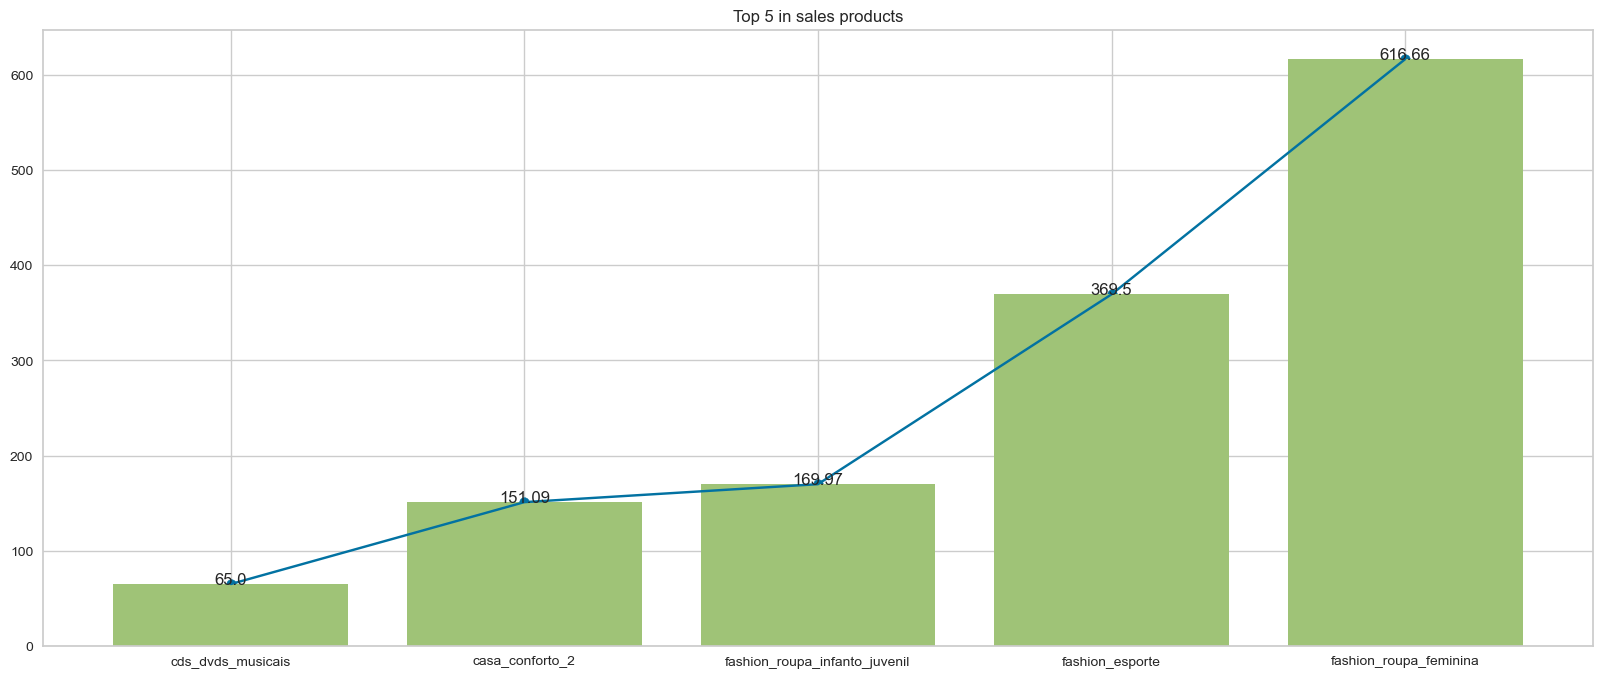

In [98]:
product_category_sales(year2018)

In [99]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
4      delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-08-17 15:28:33             2017-08-18 14:44:43   
4            2017-08-04 17:35:43             2017-08-07 18:30:01   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-08-28              1   
4                      2017-08-15              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   
4  2017-08-08 18:37:31  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   
4                     1          37.77  ef0996a1a279c26e7ecbd737be23d235   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3366     sao paulo             SP   
4                      2290     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    9350        maua           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  a20e8105f23924cd00833fd87daa0831      delivered        2017-0

In [100]:
df['review_comment_title'].isna().sum()

101832

In [101]:
df['review_comment_message'].isna().sum()

66709

In [102]:
def how_much_customer_spend(customer_id):
    customer_data = df[df['customer_unique_id'] == customer_id]
    spend = customer_data['price'].sum()
    return spend

In [103]:
how_much_customer_spend('7c396fd4830fd04220f754e42b4e5bff')

125.36

In [104]:
monetary_feature = 'customer_unique_id'
monetary_rows = 0
money = []

for chunk in pd.read_csv("../data/01_raw/e_commerce.csv", chunksize=5000):
    monetary_rows += len(chunk)
    customer_ids = chunk[monetary_feature].unique()
    for customer_id in customer_ids:
        spends = how_much_customer_spend(customer_id)
        money.append({'customer_unique_id': customer_id, 'amount_of_purchase_made_by_customer': spends})
        
    print("{0} rows processed".format(monetary_rows))

5000 rows processed
10000 rows processed
15000 rows processed
20000 rows processed
25000 rows processed
30000 rows processed
35000 rows processed
40000 rows processed
45000 rows processed
50000 rows processed
55000 rows processed
60000 rows processed
65000 rows processed
70000 rows processed
75000 rows processed
80000 rows processed
85000 rows processed
90000 rows processed
95000 rows processed
100000 rows processed
105000 rows processed
110000 rows processed
115000 rows processed
117329 rows processed


In [105]:
purchase_made_by_customer  = pd.DataFrame(money)

In [106]:
purchase_made_by_customer.head()

customer_unique_id  amount_of_purchase_made_by_customer
0  7c396fd4830fd04220f754e42b4e5bff                               125.36
1  3a51803cc0d012c3b5dc8b7528cb05f7                                29.99
2  ef0996a1a279c26e7ecbd737be23d235                                29.99
3  e781fdcc107d13d865fc7698711cc572                                29.99
4  02c9e0c05a817d4562ec0e8c90f29dba                                75.90

In [107]:
df = (df.merge(purchase_made_by_customer, on='customer_unique_id'))

In [108]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-09-04 21:22:15             2017-09-05 19:20:20   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-09-15              1   
4                      2017-08-28              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-09-11 11:43:25  35.39           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     1          44.11  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3149     sao paulo             SP   
4                      3366     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    7025   guarulhos           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  31f31efcb333fcbad2b1371c8cf0fa84      delivered        2017-0

In [109]:
df_sub_1 = df[['price', 'freight_value', 'payment_sequential','payment_installments', 'payment_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'review_score', 'late_orders_x','late_orders_y', 'days_from_last_purchase', 'how_many_time_customer_purchase', 'amount_of_purchase_made_by_customer']]

In [110]:
df_sub_1

price  freight_value  payment_sequential  payment_installments  \
0        29.99           8.72                   1                     1   
1        29.99           8.72                   3                     1   
2        29.99           8.72                   2                     1   
3        35.39           8.72                   1                     1   
4        29.99           7.78                   1                     3   
...        ...            ...                 ...                   ...   
115691  139.89          19.08                   1                     3   
115692   60.00          20.69                   1                     1   
115693   60.00          19.61                   1                     2   
115694   60.00          19.61                   1                     5   
115695   28.80          11.22                   1                     3   

        payment_value  product_name_lenght  product_description_lenght  \
0               18.12                 40.0                       268.0   
1                2.00                 40.0                       268.0   
2               18.59                 40.0                       268.0   
3               44.11                 35.0                      2395.0   
4               37.77                 40.0                       268.0   
...               ...                  ...                         ...   
115691         158.97                 54.0                       560.0   
115692          80.69                 49.0                       154.0   
115693          79.61                 49.0                       154.0   
115694          79.61                 49.0                       154.0   
115695          40.02                 42.0                       935.0   

        product_photos_qty  product_weight_g  product_length_cm  \
0                      4.0             500.0               19.0   
1                      4.0             500.0               19.0   
2                      4.0             500.0               19.0   
3                      1.0             350.0               19.0   
4                      4.0             500.0               19.0   
...                    ...               ...                ...   
115691                 4.0            5100.0               32.0   
115692                 1.0            1250.0               20.0   
115693                 1.0            1250.0               20.0   
115694                 1.0            1250.0               20.0   
115695                 3.0             750.0               28.0   

        product_height_cm  product_width_cm  review_score  late_orders_x  \
0                     8.0              13.0             4              1   
1                     8.0              13.0             4              1   
2                     8.0              13.0             4              1   
3                    14.0              12.0             5              1   
4                     8.0              13.0             4              1   
...                   ...               ...           ...            ...   
115691               19.0              29.0             5              1   
115692               22.0              16.0             1              1   
115693               22.0              16.0             4              1   
115694               22.0              16.0             5              1   
115695               15.0              12.0             1              1   

        late_orders_y  days_from_last_purchase  \
0                 7.0                       28   
1                 7.0                       28   
2                 7.0                       28   
3                 9.0                       28   
4                 9.0                        1   
...               ...                      ...   
115691           12.0                        1   
115692           17.0                        1   
115693           20.0                        1   
1

<Axes: >

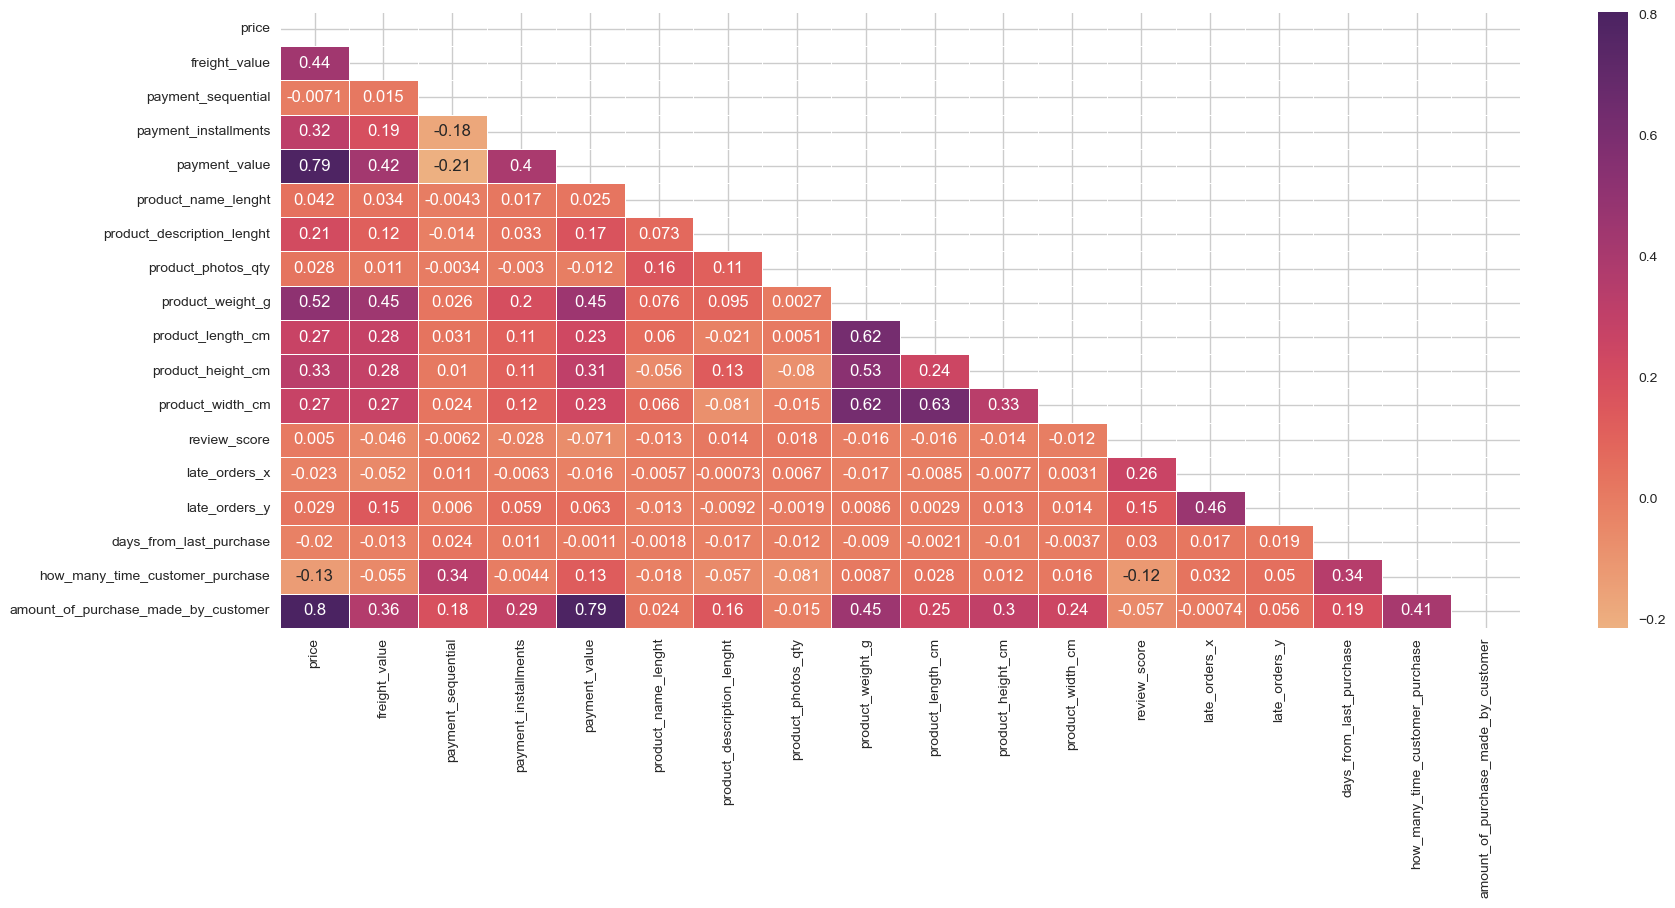

In [111]:
figure(figsize=(20, 8))
mask = np.zeros_like(df_sub_1.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_sub_1.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [112]:
df_sub_1.isna().sum()

price                                     0
freight_value                             0
payment_sequential                        0
payment_installments                      0
payment_value                             0
product_name_lenght                       0
product_description_lenght                0
product_photos_qty                        0
product_weight_g                          1
product_length_cm                         1
product_height_cm                         1
product_width_cm                          1
review_score                              0
late_orders_x                             0
late_orders_y                          2400
days_from_last_purchase                   0
how_many_time_customer_purchase           0
amount_of_purchase_made_by_customer       0
dtype: int64

In [113]:
df_sub_1.dropna(inplace=True)

In [114]:
df_sub_1

price  freight_value  payment_sequential  payment_installments  \
0        29.99           8.72                   1                     1   
1        29.99           8.72                   3                     1   
2        29.99           8.72                   2                     1   
3        35.39           8.72                   1                     1   
4        29.99           7.78                   1                     3   
...        ...            ...                 ...                   ...   
115690   45.00          11.15                   1                     1   
115691  139.89          19.08                   1                     3   
115692   60.00          20.69                   1                     1   
115693   60.00          19.61                   1                     2   
115694   60.00          19.61                   1                     5   

        payment_value  product_name_lenght  product_description_lenght  \
0               18.12                 40.0                       268.0   
1                2.00                 40.0                       268.0   
2               18.59                 40.0                       268.0   
3               44.11                 35.0                      2395.0   
4               37.77                 40.0                       268.0   
...               ...                  ...                         ...   
115690          56.15                 17.0                       546.0   
115691         158.97                 54.0                       560.0   
115692          80.69                 49.0                       154.0   
115693          79.61                 49.0                       154.0   
115694          79.61                 49.0                       154.0   

        product_photos_qty  product_weight_g  product_length_cm  \
0                      4.0             500.0               19.0   
1                      4.0             500.0               19.0   
2                      4.0             500.0               19.0   
3                      1.0             350.0               19.0   
4                      4.0             500.0               19.0   
...                    ...               ...                ...   
115690                 1.0            2350.0               36.0   
115691                 4.0            5100.0               32.0   
115692                 1.0            1250.0               20.0   
115693                 1.0            1250.0               20.0   
115694                 1.0            1250.0               20.0   

        product_height_cm  product_width_cm  review_score  late_orders_x  \
0                     8.0              13.0             4              1   
1                     8.0              13.0             4              1   
2                     8.0              13.0             4              1   
3                    14.0              12.0             5              1   
4                     8.0              13.0             4              1   
...                   ...               ...           ...            ...   
115690               32.0              17.0             5              1   
115691               19.0              29.0             5              1   
115692               22.0              16.0             1              1   
115693               22.0              16.0             4              1   
115694               22.0              16.0             5              1   

        late_orders_y  days_from_last_purchase  \
0                 7.0                       28   
1                 7.0                       28   
2                 7.0                       28   
3                 9.0                       28   
4                 9.0                        1   
...               ...                      ...   
115690            8.0                        1   
115691           12.0                        1   
115692           17.0                        1   
1

In [115]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  69923a4e07ce446644394df37a710286  31f31efcb333fcbad2b1371c8cf0fa84   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
1      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
2      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
3      delivered        2017-09-04 11:26:38  2017-09-04 11:43:25   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
1            2017-10-04 19:55:00             2017-10-10 21:25:13   
2            2017-10-04 19:55:00             2017-10-10 21:25:13   
3            2017-09-04 21:22:15             2017-09-05 19:20:20   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
1                      2017-10-18              1   
2                      2017-10-18              1   
3                      2017-09-15              1   
4                      2017-08-28              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  9abb00920aae319ef9eba674b7d2e6ff  1771297ac436903d1dd6b0e9279aa505   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
1  2017-10-06 11:07:15  29.99           8.72                   3      voucher   
2  2017-10-06 11:07:15  29.99           8.72                   2      voucher   
3  2017-09-11 11:43:25  35.39           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     1          44.11  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   

   customer_zip_code_prefix customer_city customer_state  \
0                      3149     sao paulo             SP   
1                      3149     sao paulo             SP   
2                      3149     sao paulo             SP   
3                      3149     sao paulo             SP   
4                      3366     sao paulo             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
1                    9350        maua           SP   
2                    9350        maua           SP   
3                    7025   guarulhos           SP   
4                    9350        maua           SP   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
1  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
2  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
3  31f31efcb333fcbad2b1371c8cf0fa84      delivered        2017-0

In [116]:
df_sub_2 = df

In [119]:
df_sub_2.drop_duplicates(subset='customer_unique_id', inplace=True)

<Axes: xlabel='how_many_time_customer_purchase', ylabel='Count'>

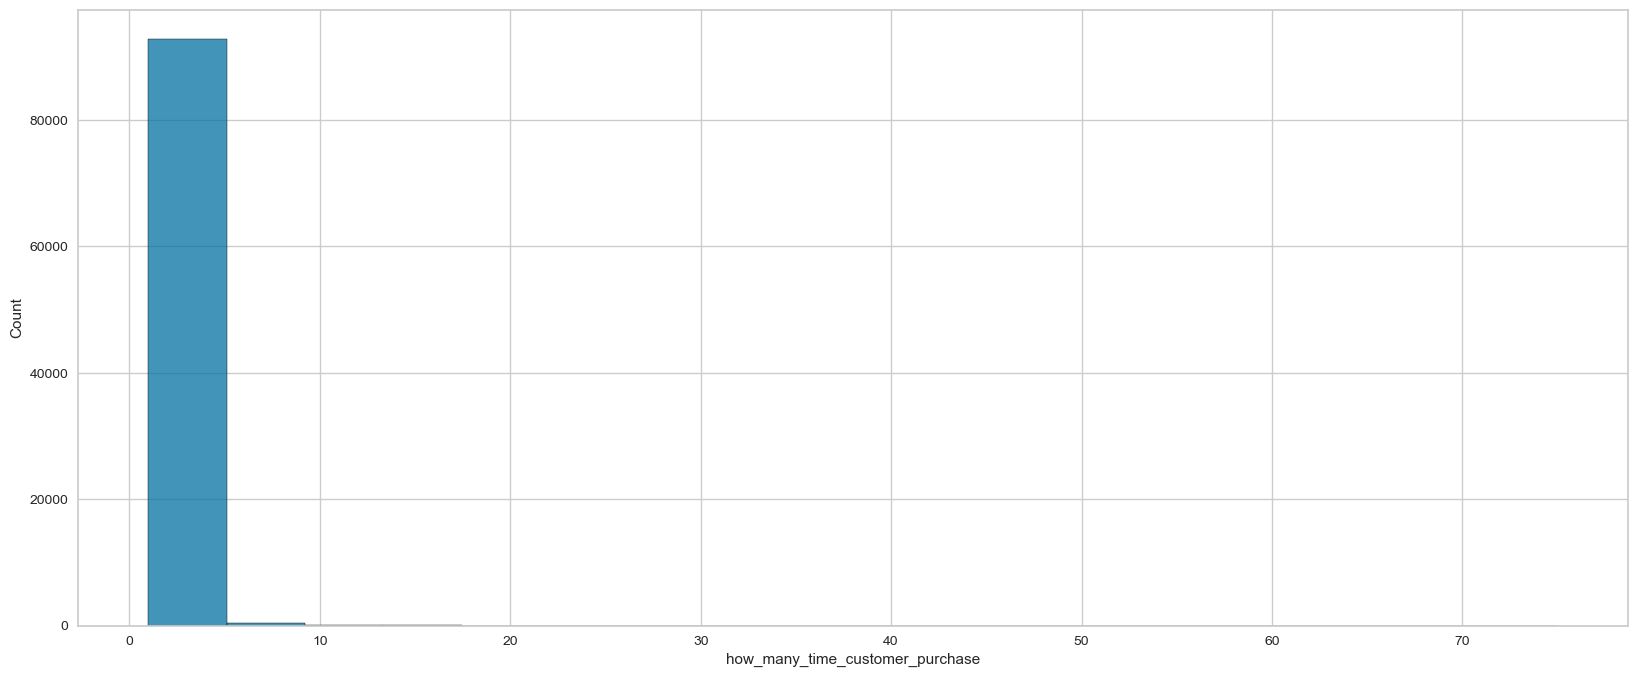

In [129]:
# Pareto Distribution
figure(figsize=(20, 8))
sns.histplot(df_sub_2['how_many_time_customer_purchase'])

<Axes: xlabel='amount_of_purchase_made_by_customer', ylabel='Count'>

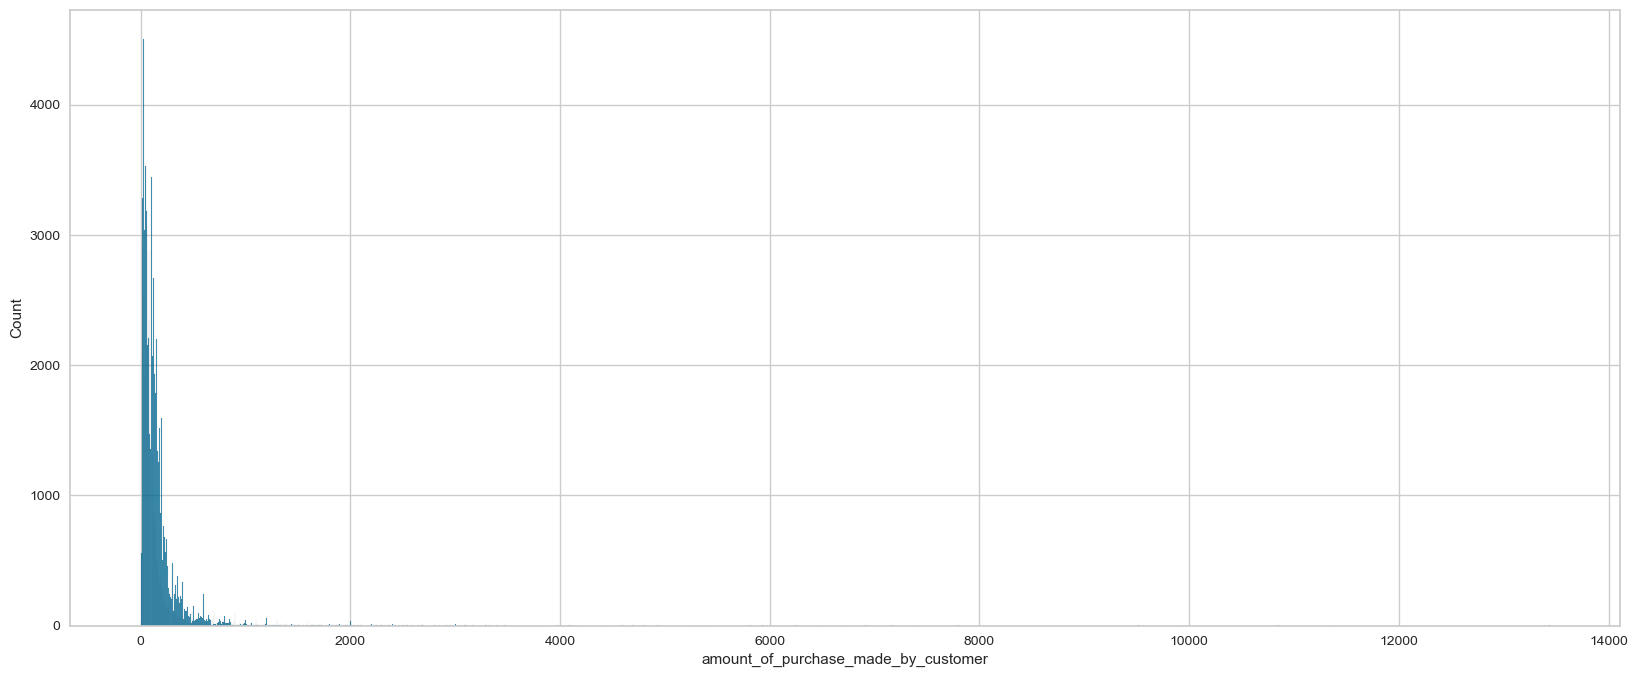

In [130]:
# Pareto Distibution
figure(figsize=(20, 8))
sns.histplot(df_sub_2['amount_of_purchase_made_by_customer'])

In [131]:
df.head()

order_id                     customer_id_x  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
5  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
6  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
7  a17308b84626455b4487b37d1d8e11af  70bc415c0f7643fbd89ef8097a3d7b79   

  order_status_x order_purchase_timestamp_x  order_approved_at_x  \
0      delivered        2017-10-02 10:56:33  2017-10-02 11:07:15   
4      delivered        2017-08-15 18:29:31  2017-08-15 20:05:16   
5      delivered        2017-08-02 18:24:47  2017-08-02 18:43:15   
6      delivered        2017-10-23 23:26:46  2017-10-25 02:14:11   
7      delivered        2018-03-20 14:01:59  2018-03-21 02:51:05   

  order_delivered_carrier_date_x order_delivered_customer_date_x  \
0            2017-10-04 19:55:00             2017-10-10 21:25:13   
4            2017-08-17 15:28:33             2017-08-18 14:44:43   
5            2017-08-04 17:35:43             2017-08-07 18:30:01   
6            2017-10-27 16:48:46             2017-11-07 18:04:59   
7            2018-03-21 19:14:40             2018-03-26 15:22:53   

  order_estimated_delivery_date_x  order_item_id  \
0                      2017-10-18              1   
4                      2017-08-28              1   
5                      2017-08-15              1   
6                      2017-11-13              1   
7                      2018-04-12              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
5  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
6  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
7  e247b2897e35481b4fd5c1bf7ace0f4e  8c16d1f32a54d92897cc437244442e1b   

   shipping_limit_date  price  freight_value  payment_sequential payment_type  \
0  2017-10-06 11:07:15  29.99           8.72                   1  credit_card   
4  2017-08-21 20:05:16  29.99           7.78                   1  credit_card   
5  2017-08-08 18:37:31  29.99           7.78                   1  credit_card   
6  2017-10-31 02:14:11  29.99          14.10                   1       boleto   
7  2018-03-27 02:51:05  42.00          13.47                   1       boleto   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
4                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   
5                     1          37.77  ef0996a1a279c26e7ecbd737be23d235   
6                     1          44.09  e781fdcc107d13d865fc7698711cc572   
7                     1          55.47  e1cc1be2730188040748affa422b2803   

   customer_zip_code_prefix  customer_city customer_state  \
0                      3149      sao paulo             SP   
4                      3366      sao paulo             SP   
5                      2290      sao paulo             SP   
6                     88032  florianopolis             SC   
7                     17050          bauru             SP   

   seller_zip_code_prefix seller_city seller_state  \
0                    9350        maua           SP   
4                    9350        maua           SP   
5                    9350        maua           SP   
6                    9350        maua           SP   
7                   89023    blumenau           SC   

                      customer_id_y order_status_y order_purchase_timestamp_y  \
0  9ef432eb6251297304e76186b10a928d      delivered        2017-10-02 10:56:33   
4  a20e8105f23924cd00833fd87daa0831      delivered        2017-08-15 18:29:31   
5  26c7ac168e1433912a51b924fbd34d34      delivered        2017-08-02 18:24:47   
6  53904ddbea91e1e92b2b3f1d09a7af86      delivered        

In [152]:
# Sentiment Analysis